<a href="https://colab.research.google.com/github/yasminmulla/CaseStudy/blob/Delhivery/Delhivery_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project : Delhivery Business Case Study :**


---


>Steps :

1. Problem Statement
2. Data Reading
3. Data Cleaning

    a. Finding unwanted coloumns

    b. Identifying Null values and missing data and fixing it.

4. Feature Engineering
5. Basic Ananlysis
6. In-depth analysis and Hypothesis Testing
7. Business Insights
8. Recommendations


#  **1. Problem Statement: Data Processing and Forecasting for Delhivery**

**About Delhivery:**

Delhivery, as the leading and rapidly expanding fully integrated player in India, envisions building the operating system for commerce. Fueled by world-class infrastructure, top-tier logistics operations, and cutting-edge engineering and technology capabilities, Delhivery aims to elevate the standards of quality, efficiency, and profitability in the business landscape.

**Objective**:

The Data team at Delhivery is on a mission to harness the power of data from their engineering pipelines. To achieve this, they seek comprehensive support in processing and analyzing the raw data, with the ultimate goal of aiding the data science team in constructing robust forecasting models.


#**2. Data Reading**

In [ ]:
##
# Importing all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy import stats


In [ ]:
##
Delhivery_df = pd.read_csv("delhivery_data.csv")

In [ ]:
Delhivery_df.head(1)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,trip_creation_year,trip_creation_day,trip_creation_hour,destination_city,destination_state,source_city,source_state,time_taken,time_taken_seconds,segment_name
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,2018,20,2,Khambhat,Gujarat,Anand_VUNagar_DC,Gujarat,0 days 01:26:12.818197,5172.818197,trip-153741093647649320_IND388121AAA_IND388620AAB


In [ ]:
Delhivery_df.shape

(144867, 24)

In [ ]:
Delhivery_df.dtypes

data                                       object
trip_creation_time                 datetime64[ns]
route_schedule_uuid                        object
route_type                               category
trip_uuid                                  object
source_center                              object
source_name                                object
destination_center                         object
destination_name                           object
start_scan_to_end_scan                    float64
actual_distance_to_destination            float64
actual_time                               float64
osrm_time                                 float64
osrm_distance                             float64
segment_actual_time                       float64
segment_osrm_time                         float64
segment_osrm_distance                     float64
trip_creation_month                         int64
trip_creation_year                          int64
trip_creation_day                           int64


In [ ]:
Delhivery_df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

#**3. Data Cleaning**

a. Finding unwanted coloumns

b. Identifying Null values and missing data and fixing it.

In [ ]:
# Here we are finding null values with percentile so that we can took some decision on null data.
for i in Delhivery_df.columns:
    null_rate = Delhivery_df[i].isna().sum() / len(Delhivery_df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

source_name null rate: 0.2%
destination_name null rate: 0.18%


In [ ]:
# Example: Drop rows with missing values
Delhivery_df.dropna(inplace=True)

In [ ]:
missing_values = Delhivery_df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [ ]:
Delhivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff       

In [ ]:
# •	is_cutoff , •	cutoff_factor , •	cutoff_factor •	factor •	segment_factor
Delhivery_df[['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']]

,is_cutoff,cutoff_factor,cutoff_timestamp,factor,segment_factor
0,True,9,2018-09-20 04:27:55,1.272727,1.272727
1,True,18,2018-09-20 04:17:55,1.200000,1.111111
2,True,27,2018-09-20 04:01:19.505586,1.428571,2.285714
3,True,36,2018-09-20 03:39:57,1.550000,1.750000
4,False,39,2018-09-20 03:33:55,1.545455,1.200000
...,...,...,...,...,...
144862,True,45,2018-09-20 21:57:20,1.566667,1.000000
144863,True,54,2018-09-20 21:31:18,1.578947,1.238095
144864,True,63,2018-09-20 21:11:18,1.590909,0.588235
144865,True,72,2018-09-20 20:53:19,1.612245,0.629630


In [ ]:
categorical_cols = Delhivery_df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f'Unique values in {col}: {Delhivery_df[col].nunique()}')
    print(f'Value counts:\n{Delhivery_df[col].value_counts()}\n')

Unique values in data: 2
Value counts:
training    104632
test         39684
Name: data, dtype: int64

Unique values in trip_creation_time: 14787
Value counts:
2018-10-01 05:04:55.268931    101
2018-09-17 04:43:09.467353    101
2018-09-28 05:23:15.359220    101
2018-10-03 05:04:14.929361    101
2018-09-27 04:47:19.425867    101
                             ... 
2018-09-17 01:26:45.903862      1
2018-09-19 06:09:03.938546      1
2018-10-03 18:45:56.568239      1
2018-10-03 23:47:01.484016      1
2018-10-03 22:22:54.493221      1
Name: trip_creation_time, Length: 14787, dtype: int64

Unique values in route_schedule_uuid: 1497
Value counts:
thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9    1812
thanos::sroute:0456b740-1dad-4929-bbe0-87d8843f5a10    1608
thanos::sroute:dca6268f-741a-4d1a-b1b0-aab13095a366    1605
thanos::sroute:a1b25549-1e77-498f-8538-00292e5bd5a2    1285
thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e5720d    1280
                                                      

** Inferences:**

Low Null Rates: The majority of columns have a null rate of 0.0%, indicating that these columns have complete data for all rows.

Minor Null Rates:

source_name has a null rate of 0.23%, which means a small percentage of rows have missing values in this column.
destination_city and destination_state both have a null rate of 0.17%.



In [ ]:
time_columns = [
    'start_scan_to_end_scan',
    'actual_time',
    'osrm_time',
    'segment_actual_time',
    'segment_osrm_time'
]

distance_columns = [
    'actual_distance_to_destination',
    'osrm_distance',
    'segment_osrm_distance'
]
Numberical_columns = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']

In [ ]:
columns_to_drop = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']

Delhivery_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Convert 'trip_creation_time' to Date
Delhivery_df['trip_creation_time'] = pd.to_datetime(Delhivery_df['trip_creation_time'])
# Convert 'od_start_time' to Date
Delhivery_df['od_start_time'] = pd.to_datetime(Delhivery_df['od_start_time'])
# Convert 'od_start_time' to Date
Delhivery_df['od_end_time'] = pd.to_datetime(Delhivery_df['od_end_time'])

In [ ]:
Delhivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

**# Inferences:**

The purpose of these columns are not explicitly clear from the provided information. Further analysis or domain knowledge is needed to understand its significance. Hence we are dropping these coloumns ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'].

**Overall, the dataset appears to be relatively complete, with the majority of columns having no missing values or only a small percentage of missing values.**

Outlier Finding in time_columns, distance_columns,Numberical_columns

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


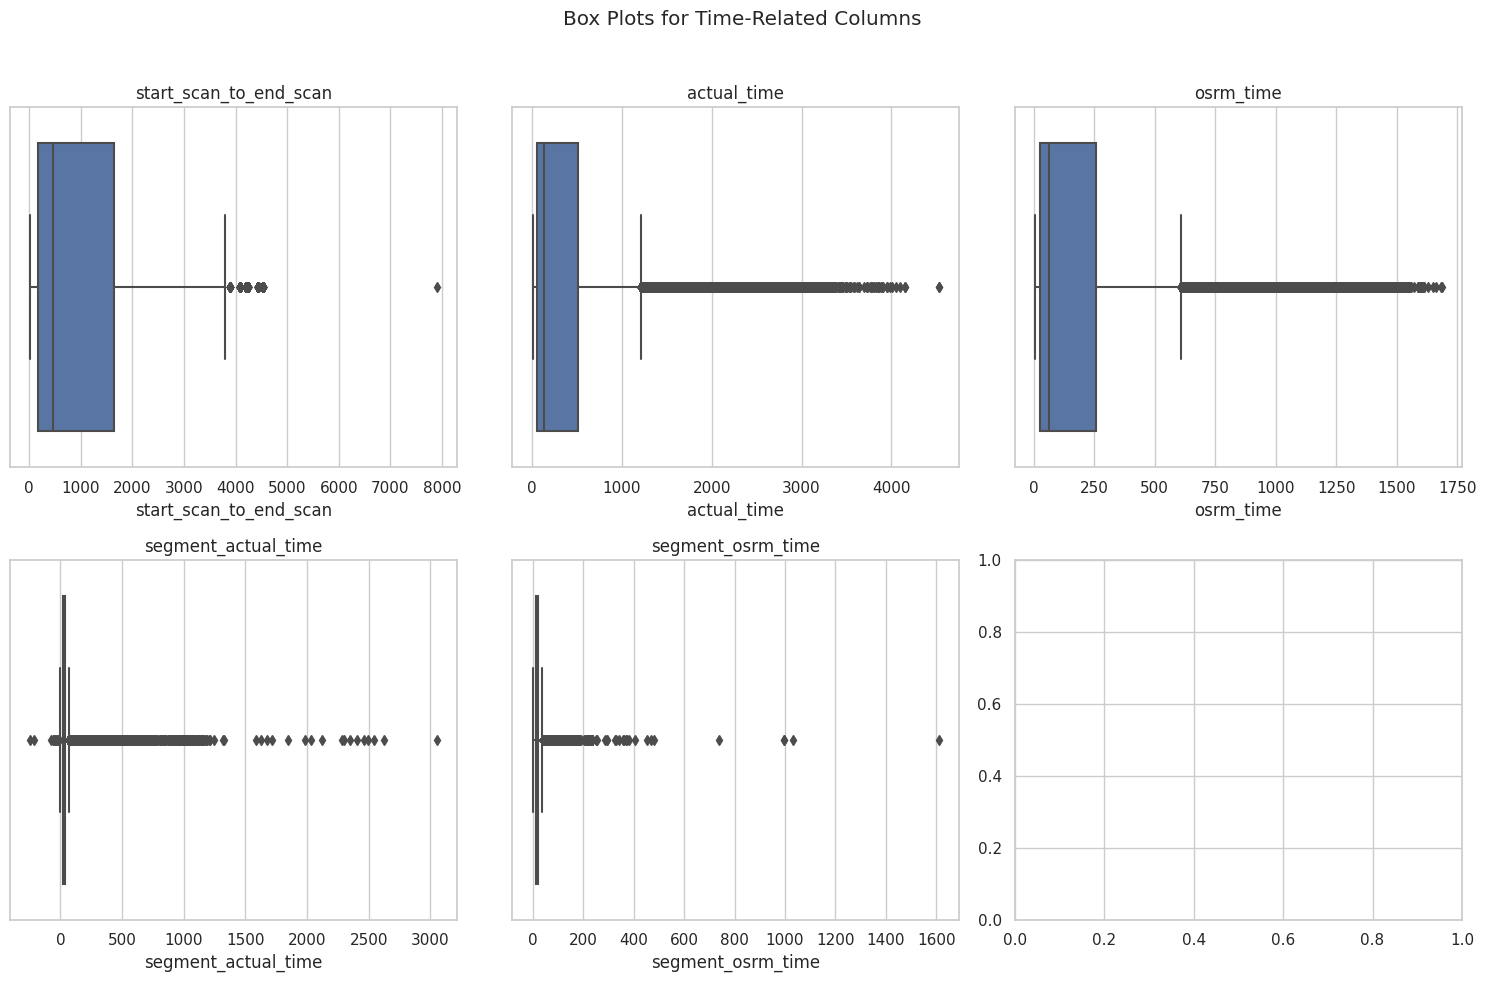

In [ ]:
# time_columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Box Plots for Time-Related Columns')

axes = axes.flatten()

# Plot box plots for each time-related column
for i, column in enumerate(time_columns):
    sns.boxplot(x=Delhivery_df[column], ax=axes[i], orient='v')
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


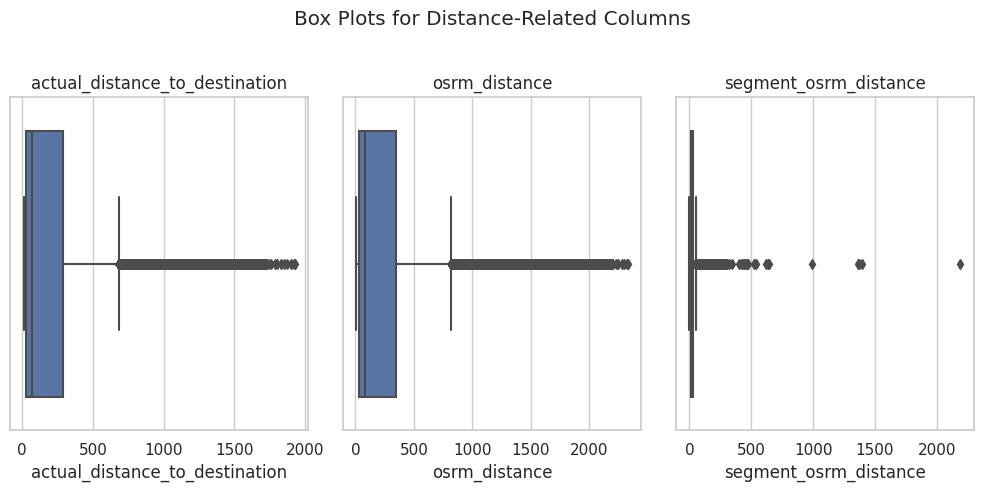

In [ ]:
# Distance_columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
fig.suptitle('Box Plots for Distance-Related Columns')

axes = axes.flatten()

# Plot box plots for each Distance-related column
for i, column in enumerate(distance_columns):
    sns.boxplot(x=Delhivery_df[column], ax=axes[i], orient='v')
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-pack

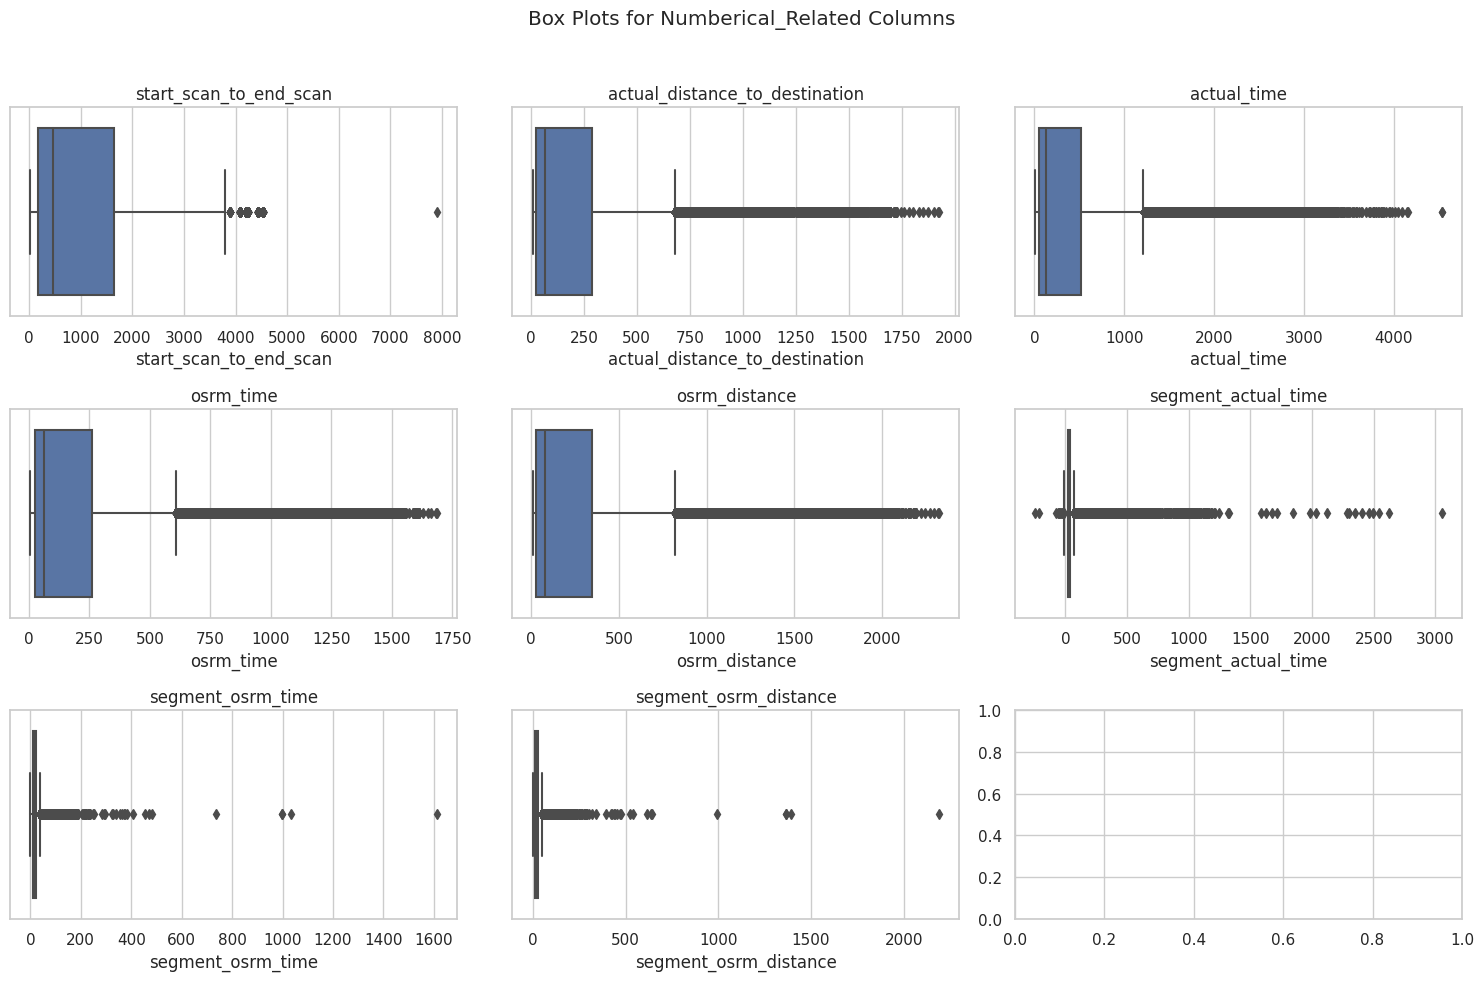

In [ ]:
# Numberical_columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Box Plots for Numberical_Related Columns')

axes = axes.flatten()

# Plot box plots for each Numberical-related column
for i, column in enumerate(Numberical_columns):
    sns.boxplot(x=Delhivery_df[column], ax=axes[i], orient='v')
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### **Inferences**

 This data is highly skewed and it can have several implications and challenges for statistical analysis
 Here are some common inferences:

**Impact on Descriptive Statistics:**

**1. Mean vs. Median:**

  The mean is highly influenced by extreme values (outliers), making it less representative of the central tendency. The median is a more robust measure in the presence of skewness.

**2. Standard Deviation:**

  The standard deviation may not accurately represent the spread of the data when it is skewed.

**Risk of Outliers:**

  **Influence of Outliers:**
  
  Skewed data may be more sensitive to the influence of outliers, affecting statistical analyses

# **4. Feature Engineering**

In [ ]:
Delhivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim


Upon reviewing the information, it seems necessary to convert certain columns into their appropriate data types.

In [ ]:
Delhivery_df.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590


In [ ]:
# Convert 'route_type' to categorical
Delhivery_df['route_type'] = Delhivery_df['route_type'].astype('category')

# Check the data types to verify the conversion
Delhivery_df.dtypes

data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                              category
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
dtype: object

In [ ]:
pd.to_datetime(Delhivery_df['trip_creation_time'])

0        2018-09-20 02:35:36.476840
1        2018-09-20 02:35:36.476840
2        2018-09-20 02:35:36.476840
3        2018-09-20 02:35:36.476840
4        2018-09-20 02:35:36.476840
                    ...            
144862   2018-09-20 16:24:28.436231
144863   2018-09-20 16:24:28.436231
144864   2018-09-20 16:24:28.436231
144865   2018-09-20 16:24:28.436231
144866   2018-09-20 16:24:28.436231
Name: trip_creation_time, Length: 144316, dtype: datetime64[ns]

In [ ]:
# Extracting features from Trip Creation Time
Delhivery_df['trip_creation_month'] = Delhivery_df['trip_creation_time'].dt.month
Delhivery_df['trip_creation_year'] = Delhivery_df['trip_creation_time'].dt.year
Delhivery_df['trip_creation_day'] = Delhivery_df['trip_creation_time'].dt.day
Delhivery_df['trip_creation_hour'] = Delhivery_df['trip_creation_time'].dt.hour

In [ ]:
Delhivery_df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,trip_creation_year,trip_creation_day,trip_creation_hour,destination_city,destination_state,source_city,source_state,time_taken,time_taken_seconds,segment_name
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,2018,20,2,Khambhat,Gujarat,Anand_VUNagar_DC,Gujarat,0 days 01:26:12.818197,5172.818197,trip-153741093647649320_IND388121AAA_IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,2018,20,2,Khambhat,Gujarat,Anand_VUNagar_DC,Gujarat,0 days 01:26:12.818197,5172.818197,trip-153741093647649320_IND388121AAA_IND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,2018,20,2,Khambhat,Gujarat,Anand_VUNagar_DC,Gujarat,0 days 01:26:12.818197,5172.818197,trip-153741093647649320_IND388121AAA_IND388620AAB


In [ ]:
Delhivery_df['destination_name']

0         Khambhat_MotvdDPP_D (Gujarat)
1         Khambhat_MotvdDPP_D (Gujarat)
2         Khambhat_MotvdDPP_D (Gujarat)
3         Khambhat_MotvdDPP_D (Gujarat)
4         Khambhat_MotvdDPP_D (Gujarat)
                      ...              
144862    Gurgaon_Bilaspur_HB (Haryana)
144863    Gurgaon_Bilaspur_HB (Haryana)
144864    Gurgaon_Bilaspur_HB (Haryana)
144865    Gurgaon_Bilaspur_HB (Haryana)
144866    Gurgaon_Bilaspur_HB (Haryana)
Name: destination_name, Length: 144316, dtype: object

In [ ]:
# Extracting features from destination_name
Delhivery_df['destination_city'] = Delhivery_df['destination_name'].apply(lambda x: x.split('_')[0] if isinstance(x, str) else np.nan)
Delhivery_df['destination_state'] = Delhivery_df['destination_name'].apply(lambda x: x.split('(')[-1] if isinstance(x, str) else np.nan)
Delhivery_df['destination_state'] = Delhivery_df['destination_state'].str.replace(')', '')

<ipython-input-226-d5f1047ceb14>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Delhivery_df['destination_state'] = Delhivery_df['destination_state'].str.replace(')', '')


In [ ]:
Delhivery_df['destination_state']

0         Gujarat
1         Gujarat
2         Gujarat
3         Gujarat
4         Gujarat
           ...   
144862    Haryana
144863    Haryana
144864    Haryana
144865    Haryana
144866    Haryana
Name: destination_state, Length: 144316, dtype: object

In [ ]:
Delhivery_df['source_name']

0         Anand_VUNagar_DC (Gujarat)
1         Anand_VUNagar_DC (Gujarat)
2         Anand_VUNagar_DC (Gujarat)
3         Anand_VUNagar_DC (Gujarat)
4         Anand_VUNagar_DC (Gujarat)
                     ...            
144862    Sonipat_Kundli_H (Haryana)
144863    Sonipat_Kundli_H (Haryana)
144864    Sonipat_Kundli_H (Haryana)
144865    Sonipat_Kundli_H (Haryana)
144866    Sonipat_Kundli_H (Haryana)
Name: source_name, Length: 144316, dtype: object

In [ ]:
# Extracting features from source_name
Delhivery_df['source_city'] = Delhivery_df['source_name'].apply(lambda x: x.split('(')[0] if isinstance(x, str) else np.nan)

Delhivery_df['source_state'] = Delhivery_df['source_name'].apply(lambda x: x.split('(')[-1] if isinstance(x, str) else np.nan)
Delhivery_df['source_state'] = Delhivery_df['source_state'].str.replace(')', '')


<ipython-input-229-1f2f22464d7b>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Delhivery_df['source_state'] = Delhivery_df['source_state'].str.replace(')', '')


In [ ]:
Delhivery_df[['source_city','source_state']].head(5)

,source_city,source_state
0,Anand_VUNagar_DC,Gujarat
1,Anand_VUNagar_DC,Gujarat
2,Anand_VUNagar_DC,Gujarat
3,Anand_VUNagar_DC,Gujarat
4,Anand_VUNagar_DC,Gujarat


In [ ]:
pd.to_datetime(Delhivery_df['trip_creation_time']).dt.month

0         9
1         9
2         9
3         9
4         9
         ..
144862    9
144863    9
144864    9
144865    9
144866    9
Name: trip_creation_time, Length: 144316, dtype: int64

In [ ]:
Delhivery_df['destination_city'].value_counts()

Gurgaon      15393
Bangalore    11087
Hyderabad     5838
Bhiwandi      5586
Delhi         5421
             ...  
Ranaghat         1
Dhuri            1
Sidhmukh         1
Shirur           1
Baghpat          1
Name: destination_city, Length: 1256, dtype: int64

In [ ]:
 #Converting destination_city,destination_state, source_city and source_state as Category coloumns
Delhivery_df['destination_city'] = Delhivery_df['destination_city'].astype('category')
Delhivery_df['destination_state'] = Delhivery_df['destination_state'].astype('category')
Delhivery_df['source_city'] = Delhivery_df['source_city'].astype('category')
Delhivery_df['source_state'] = Delhivery_df['source_state'].astype('category')

In [ ]:
# Calculate the time taken between 'od_start_time' and 'od_end_time'
Delhivery_df['time_taken'] = Delhivery_df['od_end_time'] - Delhivery_df['od_start_time']

# If you want to keep it as seconds (or any other unit), you can extract it
Delhivery_df['time_taken_seconds'] = Delhivery_df['time_taken'].dt.total_seconds()

# Dropping the original columns
Delhivery_df = Delhivery_df.drop(['od_start_time', 'od_end_time'], axis=1)

In [ ]:
Delhivery_df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,destination_city,destination_state,source_city,source_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.0,11.9653,9,2018,20,2,Khambhat,Gujarat,Anand_VUNagar_DC,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,9.0,9.7590,9,2018,20,2,Khambhat,Gujarat,Anand_VUNagar_DC,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,7.0,10.8152,9,2018,20,2,Khambhat,Gujarat,Anand_VUNagar_DC,Gujarat


In [ ]:
Delhivery_df['trip_creation_month'].value_counts()

9     126932
10     17384
Name: trip_creation_month, dtype: int64

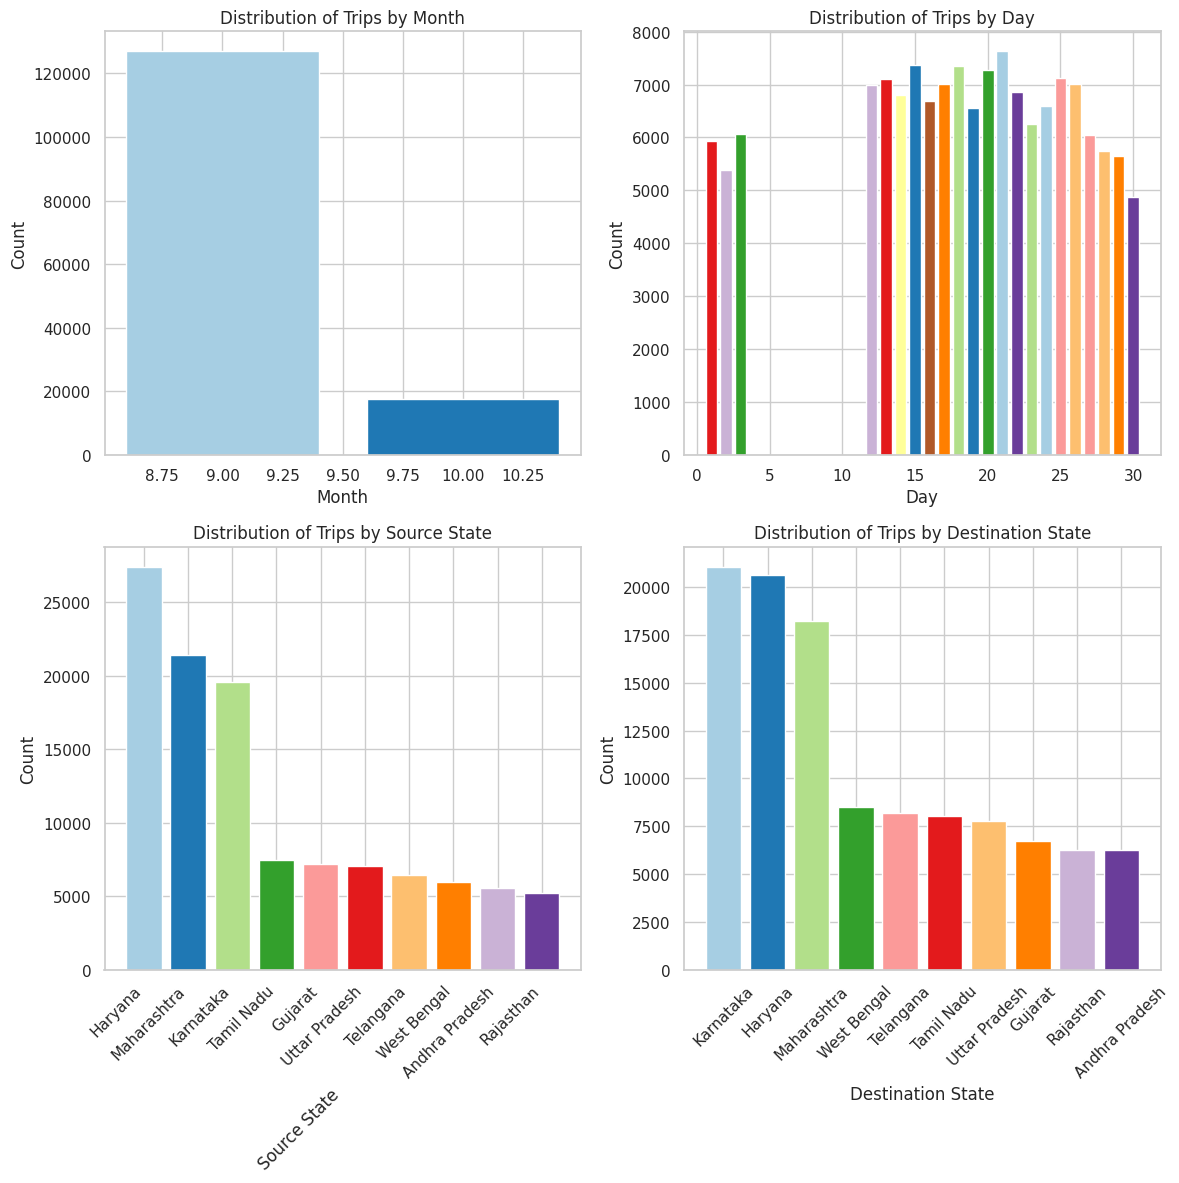

In [ ]:

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Bar chart for 'trip_creation_month'
month_counts = Delhivery_df['trip_creation_month'].value_counts()
axes[0, 0].bar(month_counts.index, month_counts, color=plt.cm.Paired.colors)
axes[0, 0].set_title('Distribution of Trips by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Count')

# Bar chart for 'trip_creation_day'
day_counts = Delhivery_df['trip_creation_day'].value_counts()
axes[0, 1].bar(day_counts.index, day_counts, color=plt.cm.Paired.colors)
axes[0, 1].set_title('Distribution of Trips by Day')
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Count')

# Bar chart for 'source_state'
source_state_counts = Delhivery_df['source_state'].value_counts().head(10)
axes[1, 0].bar(source_state_counts.index, source_state_counts , color=plt.cm.Paired.colors)
axes[1, 0].set_title('Distribution of Trips by Source State')
axes[1, 0].set_xlabel('Source State', rotation=45, ha='right')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticks(source_state_counts.index)
axes[1, 0].set_xticklabels(source_state_counts.index, rotation=45, ha='right')



# Bar chart for 'destination_state'
destination_state_counts = Delhivery_df['destination_state'].value_counts()
destination_state_counts =destination_state_counts.head(10)
axes[1, 1].bar(destination_state_counts.index , destination_state_counts, color=plt.cm.Paired.colors)
axes[1, 1].set_title('Distribution of Trips by Destination State')
axes[1, 1].set_xlabel('Destination State')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Inference : As per above graphs
1. We have only two month data Sept and oct 2018
2. 5th to 12th Month day there is no record available or might be no order placed
3. Harayana and Maharashtra are biggest contributor in terms of order generation
4. Karnataka and Haryana are biggest contributor in terms of order receivers

In [ ]:

# Group by trip_uuid
grouped_df = Delhivery_df.groupby('trip_uuid')

# Define aggregation functions for numeric fields
agg_functions = {
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
    'trip_creation_time': 'min',  #   the earliest creation time
    'destination_city': 'first',  # use 'first' for categorical columns
    'destination_state': 'first',  # use 'first' for categorical columns
}

# Perform aggregation
aggregated_df = grouped_df.agg(agg_functions).reset_index()

# Display the aggregated DataFram
aggregated_df.head()


,trip_uuid,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_time,destination_city,destination_state
0,trip-153671041653548748,10577.7647,1548.0,1008.0,1320.4733,2018-09-12 00:00:16.535741,Kanpur,Uttar Pradesh
1,trip-153671042288605164,269.4308,141.0,65.0,84.1894,2018-09-12 00:00:22.886430,Doddablpur,Karnataka
2,trip-153671043369099517,89447.2488,3308.0,1941.0,2545.2678,2018-09-12 00:00:33.691250,Gurgaon,Haryana
3,trip-153671046011330457,31.6475,59.0,16.0,19.8766,2018-09-12 00:01:00.113710,Mumbai,Maharashtra
4,trip-153671052974046625,266.2914,340.0,115.0,146.7919,2018-09-12 00:02:09.740725,Hospet (Karnataka),Karnataka


In [ ]:
# Sort by trip_creation_time in descending order
aggregated_df_sorted = aggregated_df.sort_values(by='trip_creation_time', ascending=False)

# Get the top 10 rows
top_10_trips = aggregated_df_sorted.head(10)

# Display the top 10 rows
top_10_trips.head(10)

,trip_uuid,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_time,destination_city,destination_state
14786,trip-153861118270144424,127.8020,274.0,67.0,80.5787,2018-10-03 23:59:42.701692,Sandur,Karnataka
14785,trip-153861115439069069,449.5383,258.0,221.0,223.5324,2018-10-03 23:59:14.390954,Eral,Tamil Nadu
14784,trip-153861106442901555,162.8499,281.0,88.0,104.8866,2018-10-03 23:57:44.429324,Kanpur,Uttar Pradesh
14783,trip-153861104386292051,26.5333,21.0,11.0,16.0883,2018-10-03 23:57:23.863155,Faridabad,Haryana
14782,trip-153861095625827784,162.9473,82.0,62.0,64.8551,2018-10-03 23:55:56.258533,Zirakpur,Punjab
14781,trip-153861091843037040,31.2345,37.0,16.0,20.5065,2018-10-03 23:55:18.430664,Mumbai,Maharashtra
14780,trip-153861090163768194,25.8264,41.0,11.0,15.8436,2018-10-03 23:55:01.637939,Chennai,Tamil Nadu
14779,trip-153861089872028474,61.6309,61.0,33.0,33.6400,2018-10-03 23:54:58.720536,Chennai,Tamil Nadu
14778,trip-153861089559302126,62.4373,86.0,30.0,34.9223,2018-10-03 23:54:55.593290,Mumbai,Maharashtra
14777,trip-153861089403973335,143.5996,48.0,40.0,50.0725,2018-10-03 23:54:54.039992,Anand,Gujarat


In [ ]:
aggregated_df.shape

(14787, 8)

In [ ]:
Delhivery_df['route_type'].value_counts()

FTL        99132
Carting    45184
Name: route_type, dtype: int64

In [ ]:
grouped_df['destination_city'].first()

trip_uuid
trip-153671041653548748                Kanpur
trip-153671042288605164            Doddablpur
trip-153671043369099517               Gurgaon
trip-153671046011330457                Mumbai
trip-153671052974046625    Hospet (Karnataka)
                                  ...        
trip-153861095625827784              Zirakpur
trip-153861104386292051             Faridabad
trip-153861106442901555                Kanpur
trip-153861115439069069                  Eral
trip-153861118270144424                Sandur
Name: destination_city, Length: 14787, dtype: category
Categories (1256, object): ['AMD', 'Abohar', 'Achrol', 'Addanki', ..., 'Yellandu', 'Yellareddy',
                            'Zahirabad', 'Zirakpur']

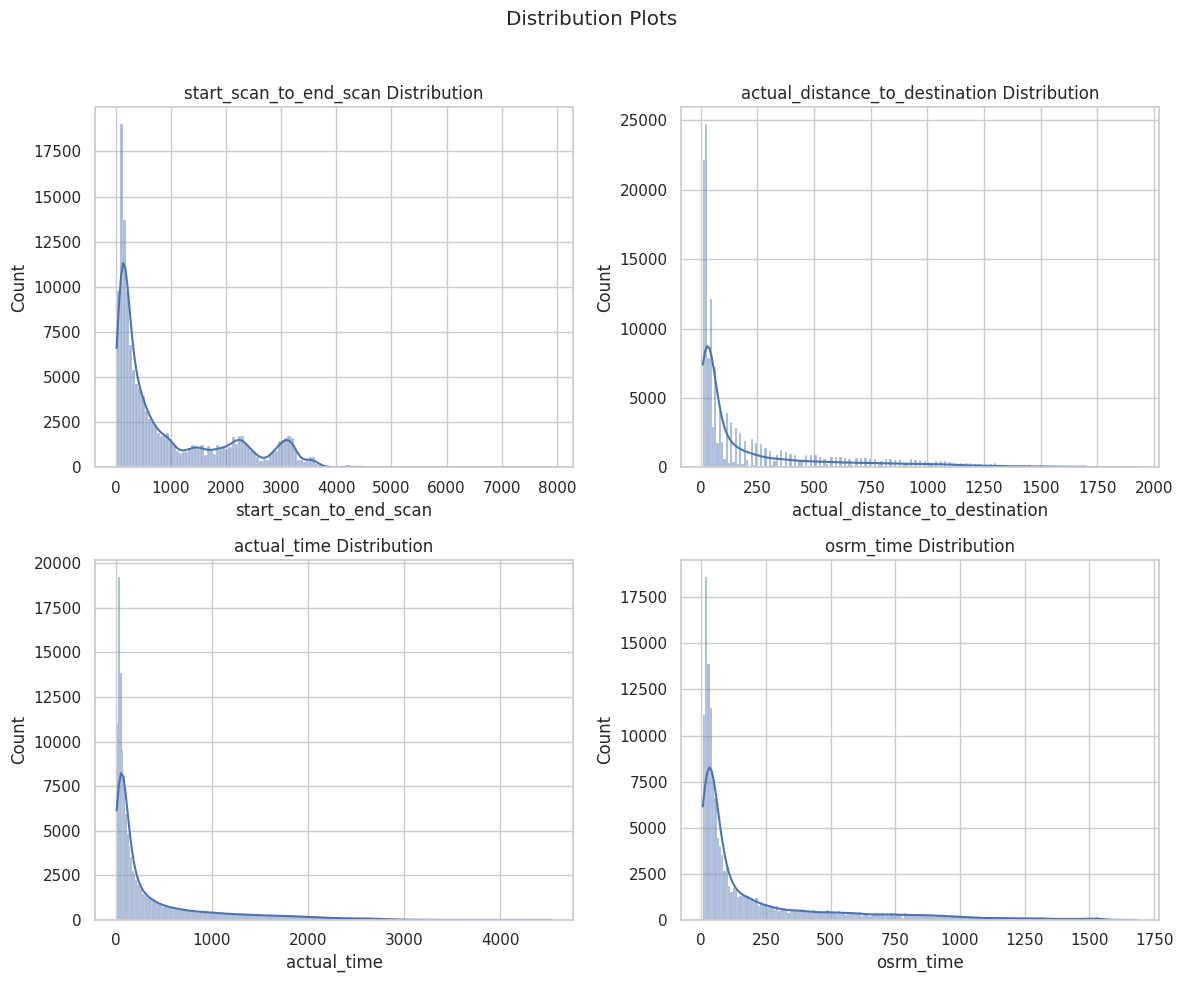

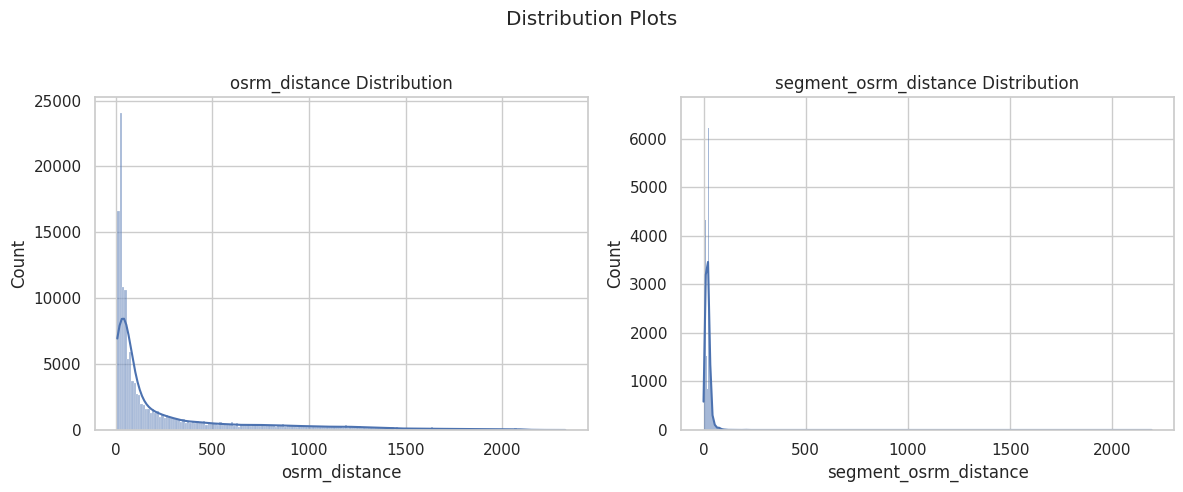

In [ ]:

# Set the style for Seaborn
sns.set(style="whitegrid")

# Plot histograms for start_scan_to_end_scan, actual_distance_to_destination, actual_time, osrm_time
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Distribution Plots")

sns.histplot(Delhivery_df['start_scan_to_end_scan'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("start_scan_to_end_scan Distribution")

sns.histplot(Delhivery_df['actual_distance_to_destination'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("actual_distance_to_destination Distribution")

sns.histplot(Delhivery_df['actual_time'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("actual_time Distribution")

sns.histplot(Delhivery_df['osrm_time'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("osrm_time Distribution")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlap
plt.show()

# Plot histograms for osrm_distance, segment_osrm_distance
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Distribution Plots")

sns.histplot(Delhivery_df['osrm_distance'], kde=True, ax=axes[0])
axes[0].set_title("osrm_distance Distribution")

sns.histplot(Delhivery_df['segment_osrm_distance'], kde=True, ax=axes[1])
axes[1].set_title("segment_osrm_distance Distribution")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlap
plt.show()


In [ ]:

# List of columns to keep the first value
first_value_cols = ['source_center', 'destination_center', 'route_type']

# List of columns to keep the last value
last_value_cols = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance' , 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance'  ]

# Aggregate based on trip_uuid
agg_df = Delhivery_df.groupby('trip_uuid').agg({
    **{col: 'first' for col in first_value_cols},
    **{col: 'last' for col in last_value_cols}
}).reset_index()

# Display the aggregated DataFrame
agg_df.head()


,trip_uuid,source_center,destination_center,route_type,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND462022AAA,IND209304AAA,FTL,383.759164,732.0,329.0,446.5496,20.0,10.0,15.0693
1,trip-153671042288605164,IND572101AAA,IND561203AAB,Carting,24.644021,47.0,26.0,28.1994,15.0,7.0,6.9464
2,trip-153671043369099517,IND562132AAA,IND000000ACB,FTL,237.439610,611.0,212.0,281.2109,275.0,28.0,32.8506
3,trip-153671046011330457,IND400072AAB,IND401104AAA,Carting,17.175274,59.0,15.0,19.6800,36.0,7.0,7.9091
4,trip-153671052974046625,IND583101AAA,IND583201AAA,FTL,41.317614,131.0,44.0,53.5761,79.0,26.0,29.0538


In [ ]:
Delhivery_df['trip_uuid'].value_counts()

trip-153837029526866991    101
trip-153715938946690081    101
trip-153811219535896559    101
trip-153854305492910872    101
trip-153802363942560700    101
                          ... 
trip-153714761197530398      1
trip-153733734393817090      1
trip-153859235656799725      1
trip-153861042148375909      1
trip-153860537449292853      1
Name: trip_uuid, Length: 14787, dtype: int64

In [ ]:
Delhivery_df['destination_center'].value_counts()

IND000000ACB    15192
IND562132AAA    11019
IND421302AAG     5492
IND501359AAE     5142
IND712311AAA     4892
                ...  
IND490023AAA        1
IND221401AAA        1
IND520011AAA        1
IND396210AAA        1
IND761020AAA        1
Name: destination_center, Length: 1466, dtype: int64

In [ ]:
Delhivery_df['source_center'].value_counts()

IND000000ACB    23267
IND562132AAA     9975
IND421302AAG     9088
IND411033AAA     4061
IND501359AAE     3340
                ...  
IND741121AAA        1
IND493445AAB        1
IND621112AAA        1
IND733202AAC        1
IND335501AAA        1
Name: source_center, Length: 1496, dtype: int64

In [ ]:
print("Unique trip_uuid count in Delhivery_df:", Delhivery_df['trip_uuid'].nunique())
print("Unique trip_uuid count in agg_df:", agg_df['trip_uuid'].nunique())


Unique trip_uuid count in Delhivery_df: 14787
Unique trip_uuid count in agg_df: 14787


In [ ]:
Delhivery_df['destination_city'].value_counts()

Gurgaon      15393
Bangalore    11087
Hyderabad     5838
Bhiwandi      5586
Delhi         5421
             ...  
Falna            1
Dhoraji          1
Durg             1
Dhuri            1
Bhadohi          1
Name: destination_city, Length: 1256, dtype: int64

In [ ]:
Delhivery_df['source_city'].value_counts()

Gurgaon_Bilaspur_HB         23267
Bangalore_Nelmngla_H         9975
Bhiwandi_Mankoli_HB          9088
Pune_Tathawde_H              4061
Hyderabad_Shamshbd_H         3340
                            ...  
Islampure_Central_DPP_2         1
Kasganj_BnkrGate_D              1
Badkulla_Central_DPP_1          1
Chikhli_KKndrDPP_D              1
Bhubaneswar_Patia               1
Name: source_city, Length: 1496, dtype: int64

# **5. Basic Ananlysis**

In [ ]:
Delhivery_Num_Df = Delhivery_df[Numberical_columns]
Delhivery_Num_Df.head(3)

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152


In [ ]:
Delhivery_Num_Df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,234.708498,417.996237,214.437055,285.549785,36.175379,18.495697,22.818993
std,1038.082976,345.480571,598.940065,308.448543,421.717826,53.524298,14.774008,17.866367
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,161.000000,23.352027,51.000000,27.000000,29.896250,20.000000,11.000000,12.053975
50%,451.000000,66.135322,132.000000,64.000000,78.624400,28.000000,17.000000,23.508300
75%,1645.000000,286.919294,516.000000,259.000000,346.305400,40.000000,22.000000,27.813325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.403700


In [ ]:
Q1_time = Delhivery_df['osrm_time'].quantile(0.25)
Q3_time = Delhivery_df['osrm_time'].quantile(0.75)
IQR_time = Q3_time - Q1_time

time_outliers = Delhivery_df[(Delhivery_df['osrm_time'] < Q1_time - 1.5 * IQR_time) | (Delhivery_df['osrm_time'] > Q3_time + 1.5 * IQR_time)]
time_outliers_count = time_outliers.shape[0]

Q1_distance = Delhivery_df['actual_distance_to_destination'].quantile(0.25)
Q3_distance = Delhivery_df['actual_distance_to_destination'].quantile(0.75)
IQR_distance = Q3_distance - Q1_distance

distance_outliers = Delhivery_df[(Delhivery_df['actual_distance_to_destination'] < Q1_distance - 1.5 * IQR_distance) | (Delhivery_df['actual_distance_to_destination'] > Q3_distance + 1.5 * IQR_distance)]
distance_outliers_count = distance_outliers.shape[0]

In [ ]:

# Function to find outliers based on IQR
def find_outliers(data, columns):
    outliers = pd.DataFrame()
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        column_outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
        outliers = pd.concat([outliers, column_outliers])
    return outliers

# Find outliers for time columns
time_outliers = find_outliers(Delhivery_df, time_columns)
time_outliers_count = time_outliers.shape[0]

# Find outliers for distance columns
distance_outliers = find_outliers(Delhivery_df, distance_columns)
distance_outliers_count = distance_outliers.shape[0]

print(f"Count of outliers in time columns: {time_outliers_count}")
print(f"Count of outliers in distance columns: {distance_outliers_count}")

Count of outliers in time columns: 49896
Count of outliers in distance columns: 39660


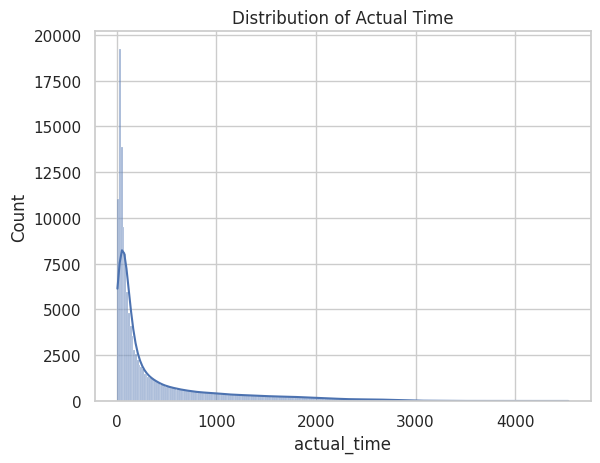

In [ ]:
sns.histplot(Delhivery_df['actual_time'], kde=True)
plt.title('Distribution of Actual Time')
plt.show()

In [ ]:
orders_by_month = Delhivery_df.groupby('trip_creation_day').size().reset_index(name='order_count')
orders_by_month = orders_by_month.sort_values(by='order_count', ascending=False)
orders_by_month.head(20)

,trip_creation_day,order_count
12,21,7626
6,15,7366
9,18,7354
11,20,7272
16,25,7120
4,13,7110
17,26,7011
8,17,7006
3,12,6995
13,22,6865


In [ ]:
orders_by_month = Delhivery_df.groupby('trip_creation_month').size().reset_index(name='order_count')
orders_by_month = orders_by_month.sort_values(by='order_count', ascending=False)
orders_by_month

,trip_creation_month,order_count
0,9,126932
1,10,17384


In [ ]:
orders_by_state = Delhivery_df.groupby('source_state').size().reset_index(name='order_count')
orders_by_state = orders_by_state.sort_values(by='order_count', ascending=False)

In [ ]:
orders_by_state.head(20)

,source_state,order_count
10,Haryana,27408
17,Maharashtra,21401
14,Karnataka,19562
25,Tamil Nadu,7494
9,Gujarat,7202
28,Uttar Pradesh,7086
26,Telangana,6476
30,West Bengal,5963
0,Andhra Pradesh,5539
24,Rajasthan,5230


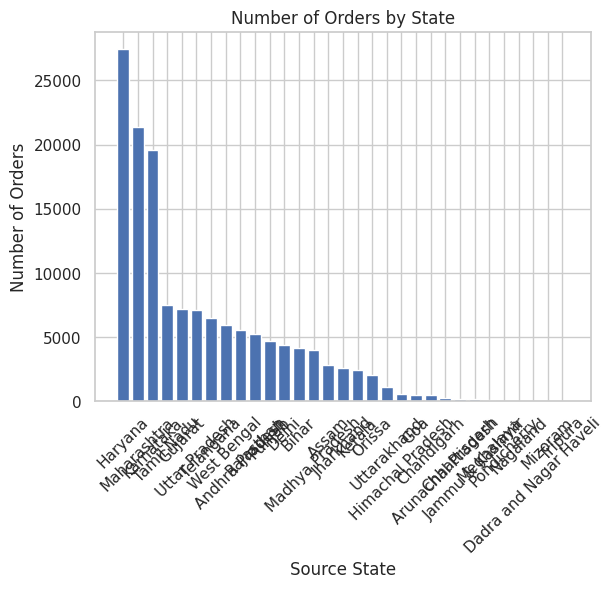

In [ ]:


plt.bar(orders_by_state['source_state'], orders_by_state['order_count'])
plt.xlabel('Source State')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by State')
plt.xticks(rotation=45)
plt.show()


In [ ]:


# Function to find outliers based on IQR
def find_outliers(data, columns):
    outliers = pd.DataFrame()
    outlier_counts = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        column_outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
        outliers = pd.concat([outliers, column_outliers])
        outlier_counts[col] = column_outliers.shape[0]
    return outliers, outlier_counts

# Find outliers for time columns
time_outliers, time_outlier_counts = find_outliers(Delhivery_df, time_columns)

# Find outliers for distance columns
distance_outliers, distance_outlier_counts = find_outliers(Delhivery_df, distance_columns)

# Find column with the maximum number of outliers for time and distance
max_time_outlier_column = max(time_outlier_counts, key=time_outlier_counts.get)
max_distance_outlier_column = max(distance_outlier_counts, key=distance_outlier_counts.get)

print(f"Column with the maximum outliers in time: {max_time_outlier_column} ({time_outlier_counts[max_time_outlier_column]} outliers)")
print(f"Column with the maximum outliers in distance: {max_distance_outlier_column} ({distance_outlier_counts[max_distance_outlier_column]} outliers)")

Column with the maximum outliers in time: osrm_time (17406 outliers)
Column with the maximum outliers in distance: actual_distance_to_destination (17818 outliers)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


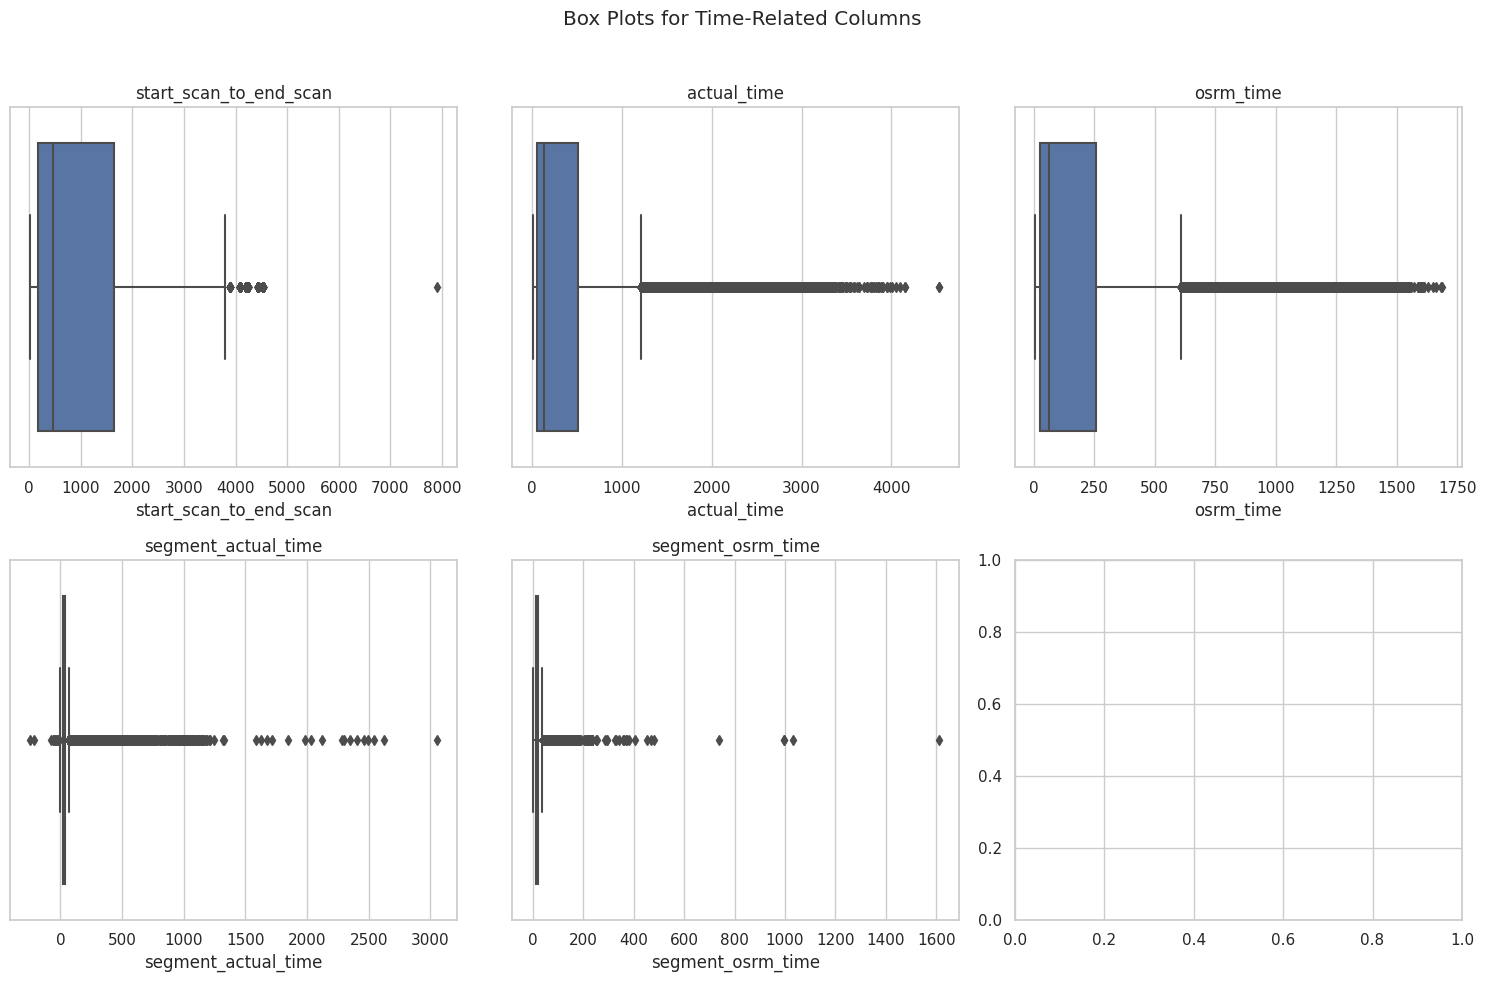

In [ ]:


# Select relevant time-related columns


# Create a new figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Box Plots for Time-Related Columns')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot box plots for each time-related column
for i, column in enumerate(time_columns):
    sns.boxplot(x=Delhivery_df[column], ax=axes[i], orient='v')
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


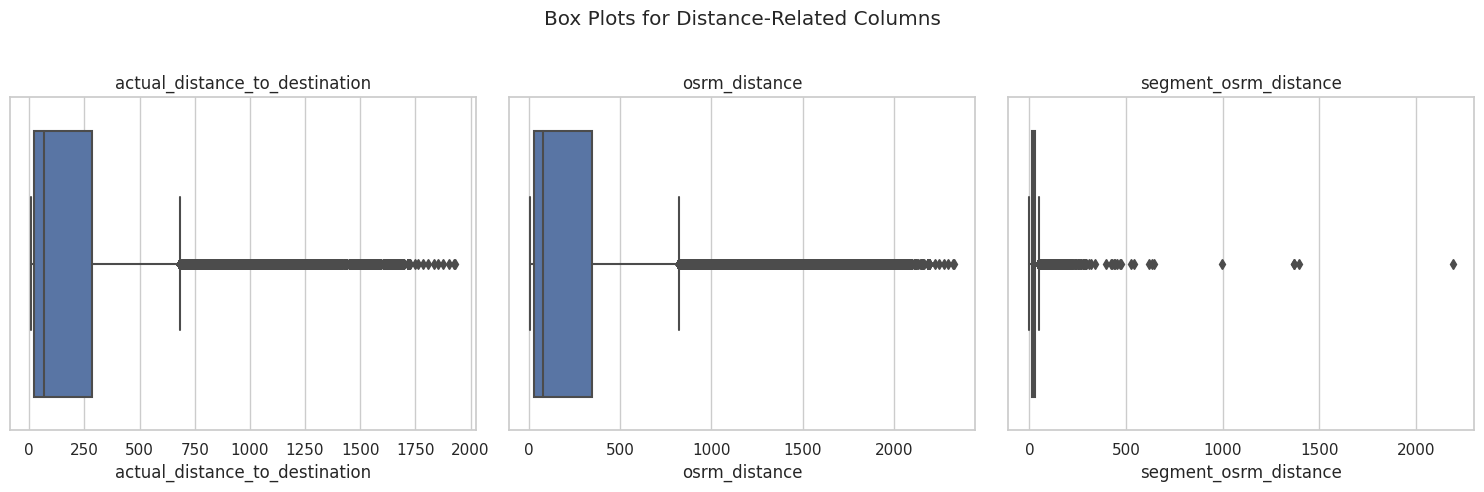

In [ ]:

# Create a new figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Box Plots for Distance-Related Columns')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot box plots for each distance-related column
for i, column in enumerate(distance_columns):
    sns.boxplot(x=Delhivery_df[column], ax=axes[i], orient='v')
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

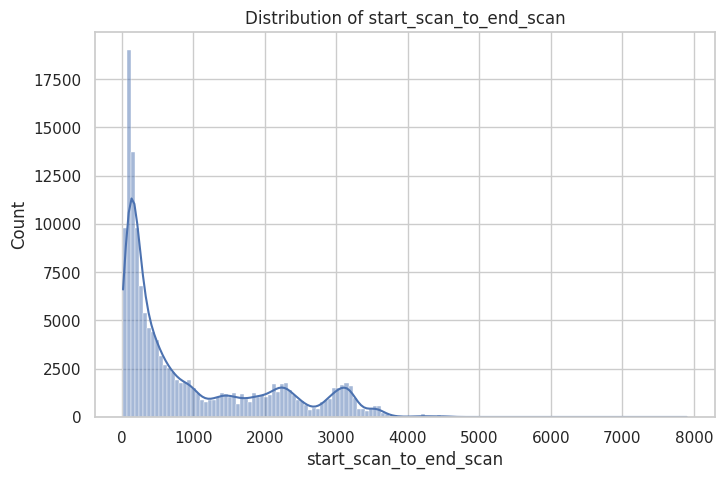

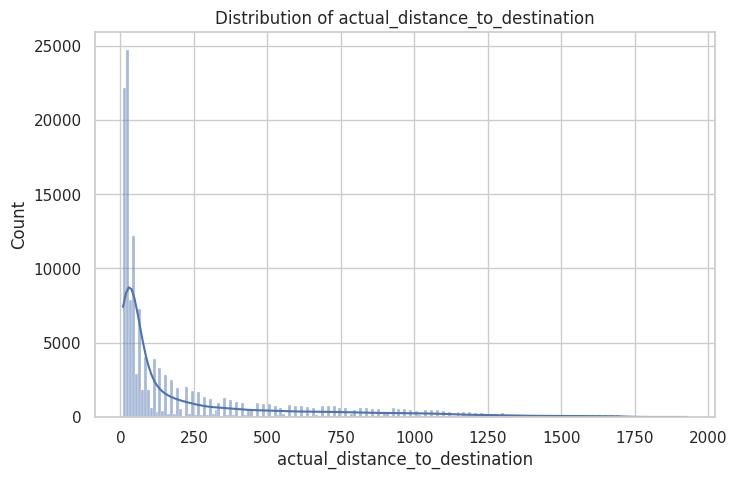

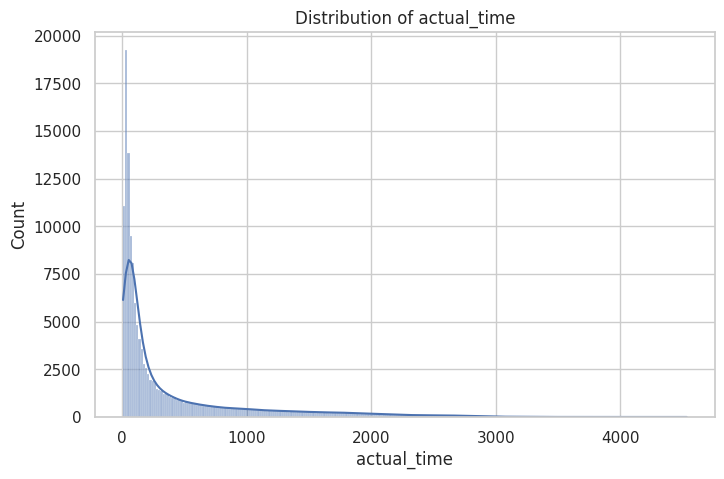

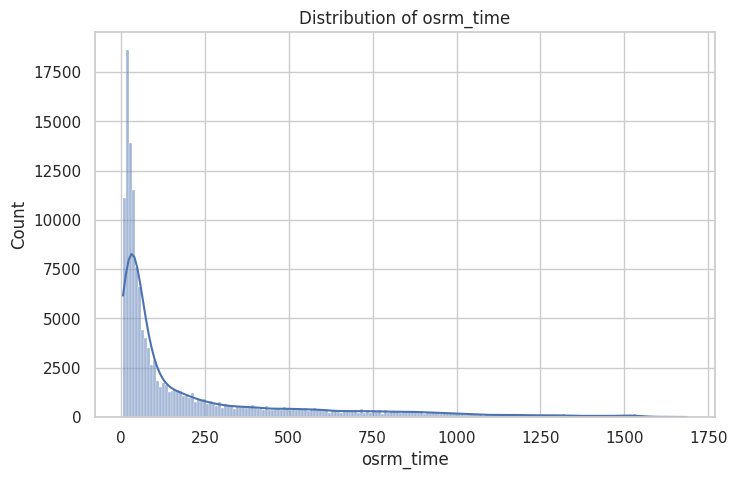

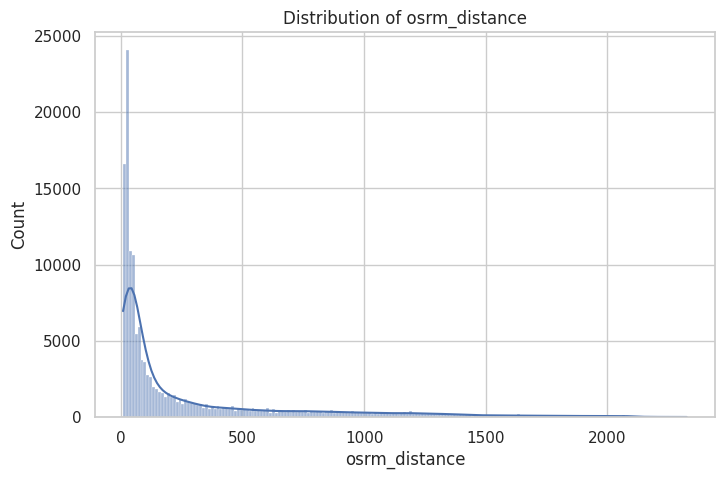

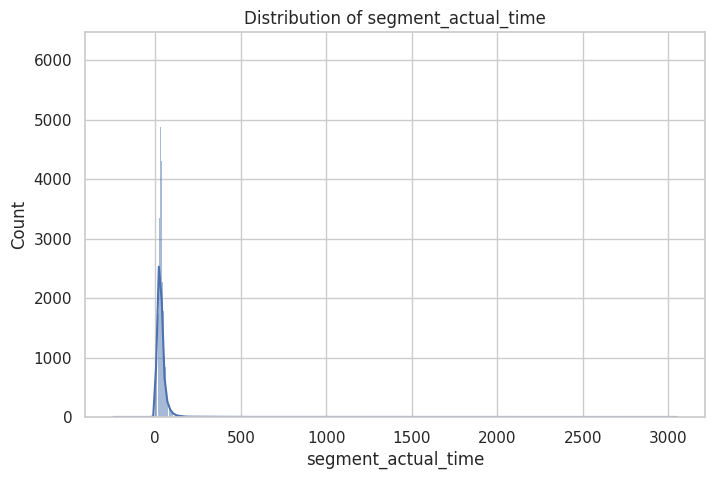

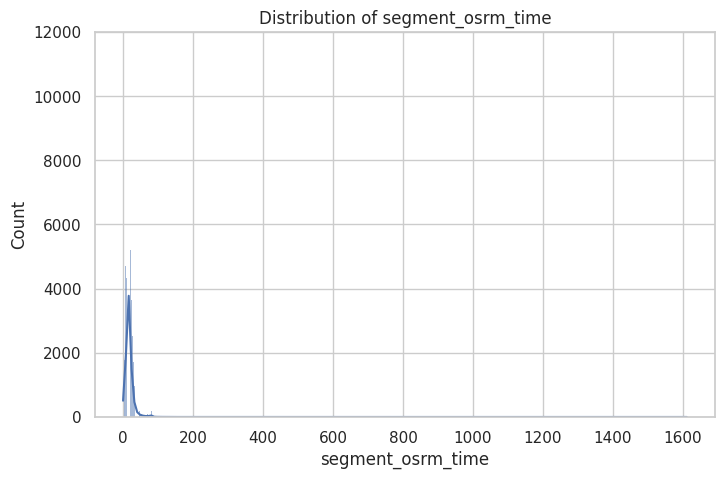

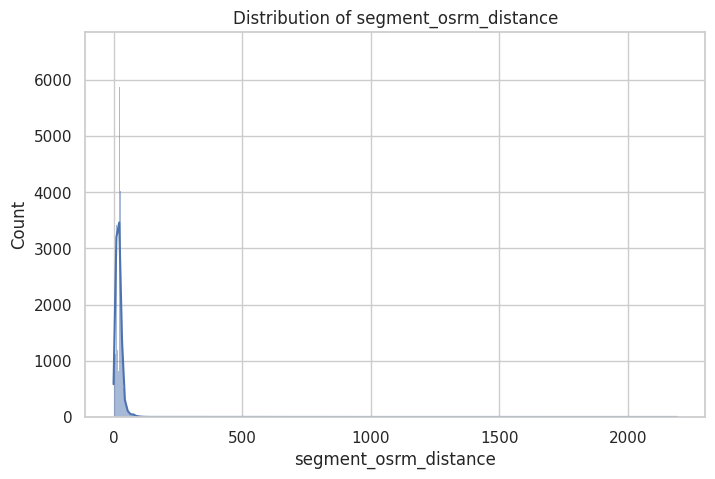

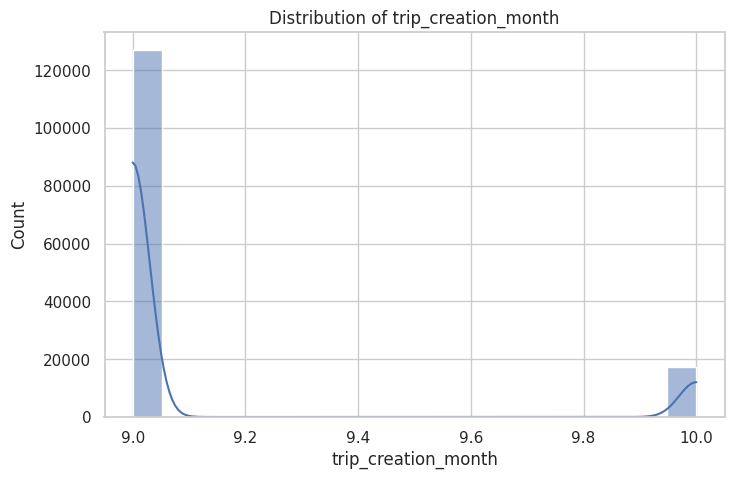

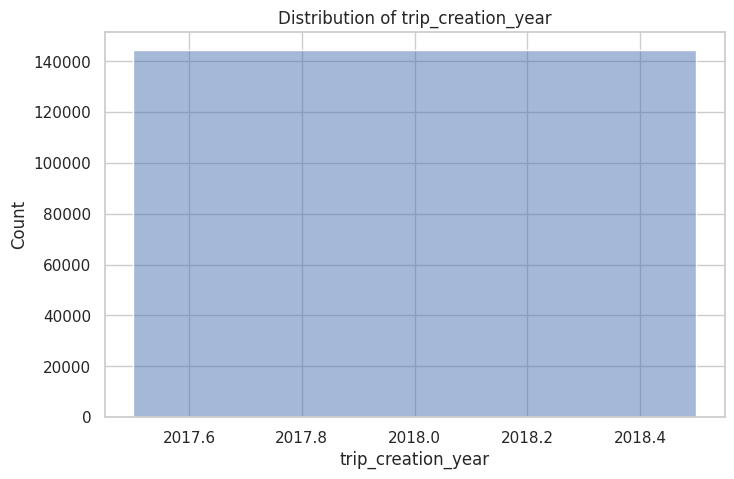

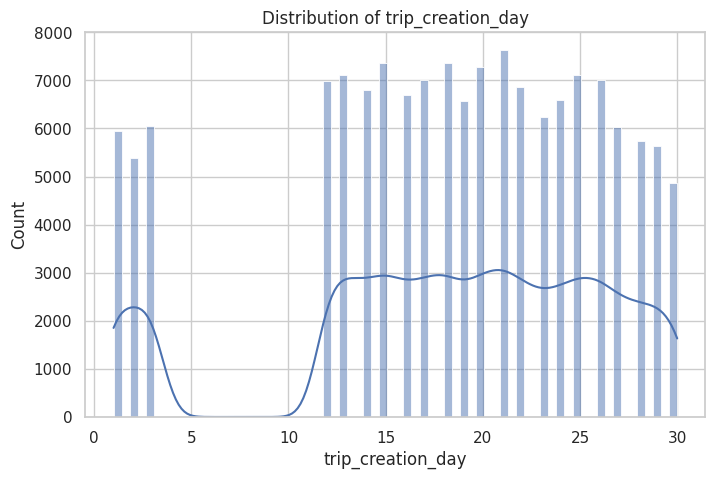

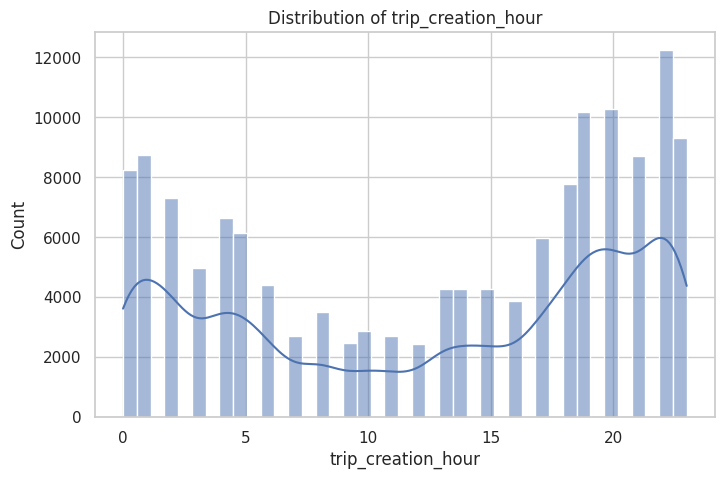

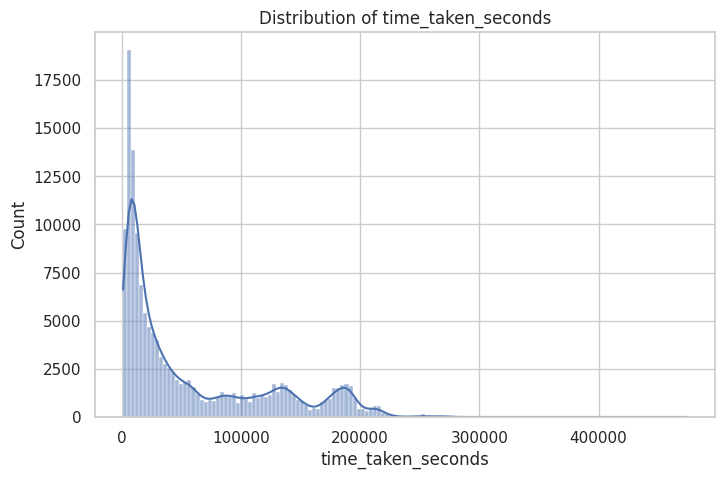

In [ ]:

numerical_cols = Delhivery_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(Delhivery_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

The data has a wide range, as indicated by the difference between the minimum and maximum values.
The average values (means) provide a central tendency measure for each column.
Standard deviations highlight the variability in the data.
Percentiles give insights into the distribution of data at different points.

In [ ]:
corridor_groups = Delhivery_df.groupby(['source_city', 'destination_city'])
avg_distance = corridor_groups['actual_distance_to_destination'].mean()
avg_time = corridor_groups['actual_time'].mean()
busiest_corridor_distance = avg_distance.idxmax()
busiest_corridor_time = avg_time.idxmax()
quietest_corridor_distance = avg_distance.idxmin()
quietest_corridor_time = avg_time.idxmin()
print(f"Busiest Corridor (by distance): {busiest_corridor_distance}, Avg. Distance: {avg_distance.max()}, Avg. Time: {avg_time.loc[busiest_corridor_distance]}")
print(f"Busiest Corridor (by time): {busiest_corridor_time}, Avg. Distance: {avg_distance.loc[busiest_corridor_time]}, Avg. Time: {avg_time.max()}")
print(f"Quietest Corridor (by distance): {quietest_corridor_distance}, Avg. Distance: {avg_distance.min()}, Avg. Time: {avg_time.loc[quietest_corridor_distance]}")
print(f"Quietest Corridor (by time): {quietest_corridor_time}, Avg. Distance: {avg_distance.loc[quietest_corridor_time]}, Avg. Time: {avg_time.min()}")


Busiest Corridor (by distance): ('Chandigarh_Mehmdpur_H ', 'Bangalore'), Avg. Distance: 1050.7516678097484, Avg. Time: 1682.7283950617284
Busiest Corridor (by time): ('Delhi_Airport_H ', 'Guwahati'), Avg. Distance: 759.6611628624659, Avg. Time: 1861.8676470588234
Quietest Corridor (by distance): ('Bengaluru_South_D_20 ', 'Bengaluru'), Avg. Distance: 9.028851667115056, Avg. Time: 30.0
Quietest Corridor (by time): ('Nabarangpr_PhdofDPP_D ', 'Pappadahandi'), Avg. Distance: 11.060638382776276, Avg. Time: 13.666666666666666


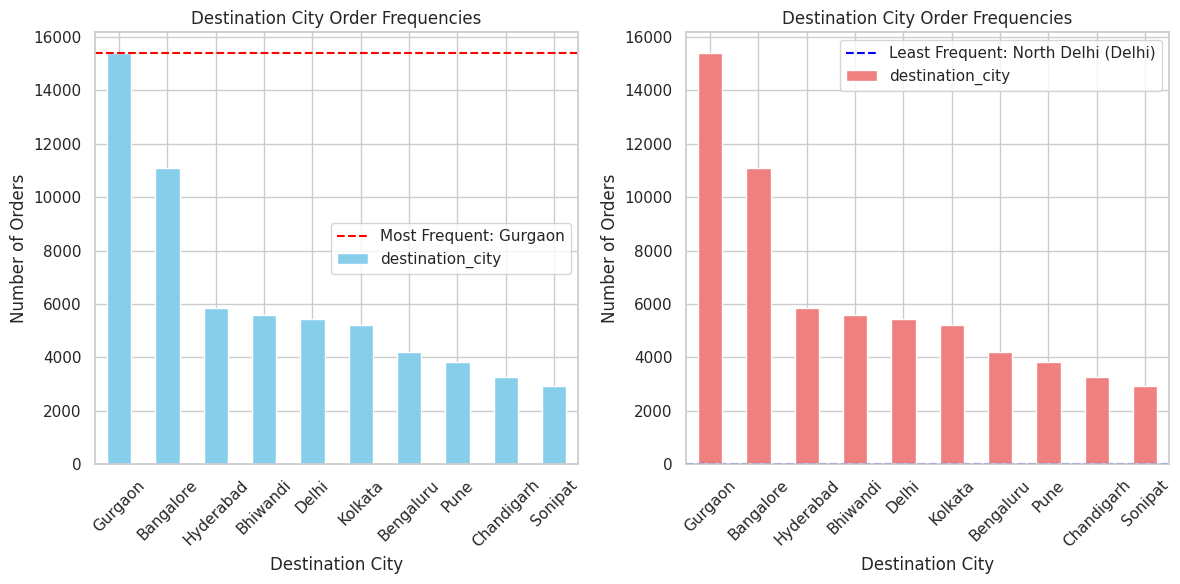

In [ ]:


# Grouping by destination city and counting occurrences
destination_city_counts = Delhivery_df['destination_city'].value_counts()

# Most frequent destination city
most_frequent_city = destination_city_counts.idxmax()
most_frequent_count = destination_city_counts.max()

# Least frequent destination city
least_frequent_city = destination_city_counts.idxmin()
least_frequent_count = destination_city_counts.min()

# Plotting the results
plt.figure(figsize=(12, 6))
destination_city_counts_most = destination_city_counts.head(10)
# Bar chart for the most frequent destination city
plt.subplot(1, 2, 1)
destination_city_counts_most.plot(kind='bar', color='skyblue')
plt.title('Destination City Order Frequencies')
plt.xlabel('Destination City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

# Highlighting the most frequent city
plt.axhline(y=most_frequent_count, color='red', linestyle='--', label=f'Most Frequent: {most_frequent_city}')
plt.legend()
destination_city_counts_least = destination_city_counts.head(10)
# Bar chart for the least frequent destination city
plt.subplot(1, 2, 2)
destination_city_counts_least.plot(kind='bar', color='lightcoral')
plt.title('Destination City Order Frequencies')
plt.xlabel('Destination City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

# Highlighting the least frequent city
plt.axhline(y=least_frequent_count, color='blue', linestyle='--', label=f'Least Frequent: {least_frequent_city}')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
Delhivery_df['segment_name'] = Delhivery_df['trip_uuid'].astype(str) + '_' + Delhivery_df['source_center'].astype(str) + '_' + Delhivery_df['destination_center'].astype(str)

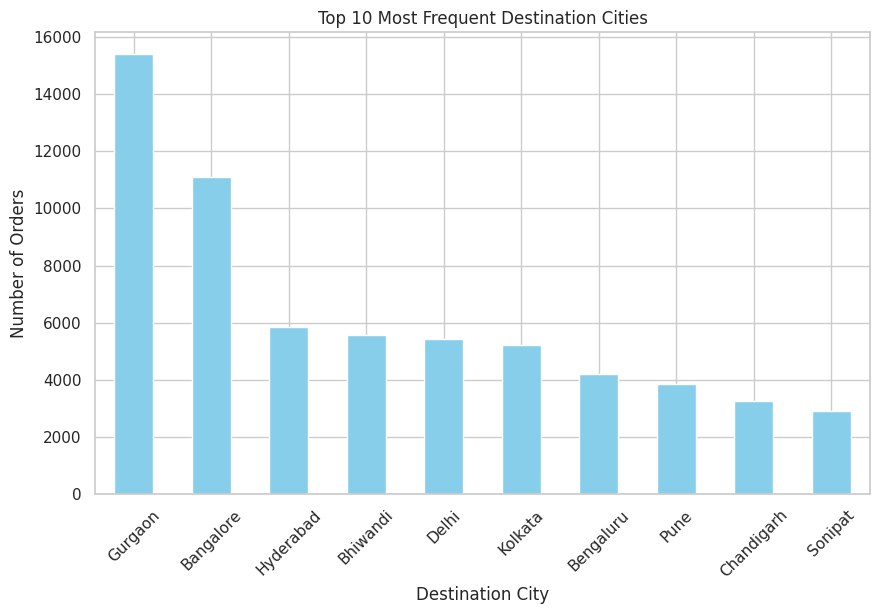

In [ ]:

# Grouping by destination city and counting occurrences
destination_city_counts = Delhivery_df['destination_city'].value_counts()

# Selecting the top N (e.g., top 10) most frequent destination cities
top_destination_cities = destination_city_counts.head(10)

# Plotting the results
plt.figure(figsize=(10, 6))
top_destination_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Destination Cities')
plt.xlabel('Destination City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


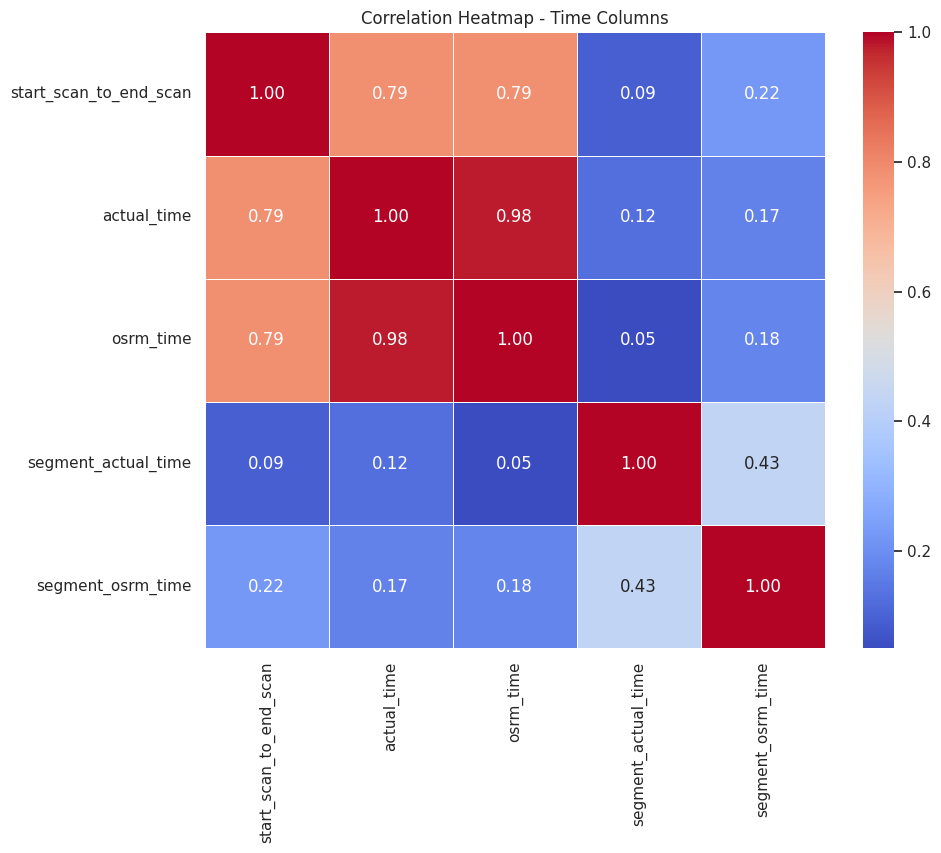

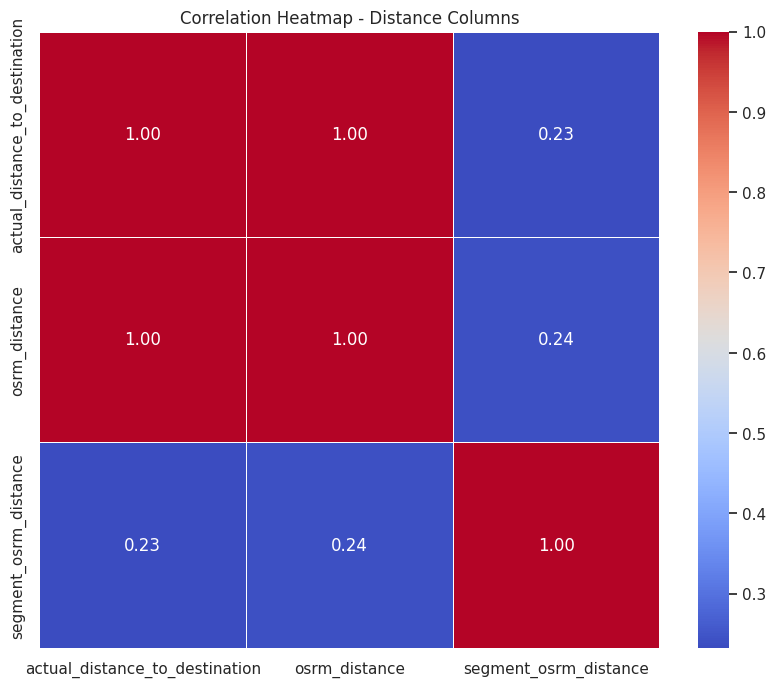

In [ ]:


# Subset the dataframe with time columns
time_df = Delhivery_df[time_columns]

# Create a heatmap for time columns
plt.figure(figsize=(10, 8))
sns.heatmap(time_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Time Columns')
plt.show()

# Subset the dataframe with distance columns
distance_df = Delhivery_df[distance_columns]

# Create a heatmap for distance columns
plt.figure(figsize=(10, 8))
sns.heatmap(distance_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Distance Columns')
plt.show()

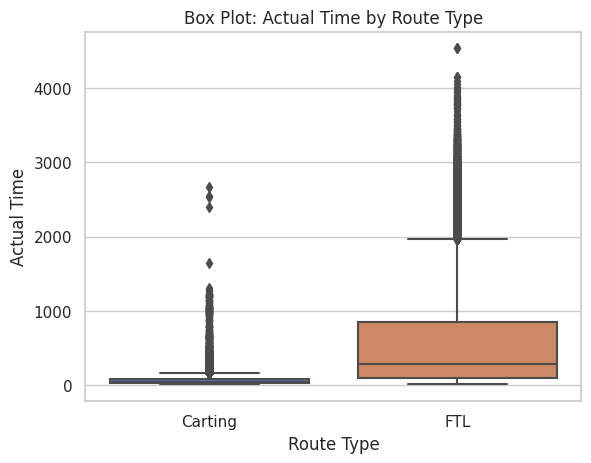

In [ ]:


sns.boxplot(x='route_type', y='actual_time', data=Delhivery_df)
plt.xlabel('Route Type')
plt.ylabel('Actual Time')
plt.title('Box Plot: Actual Time by Route Type')
plt.show()


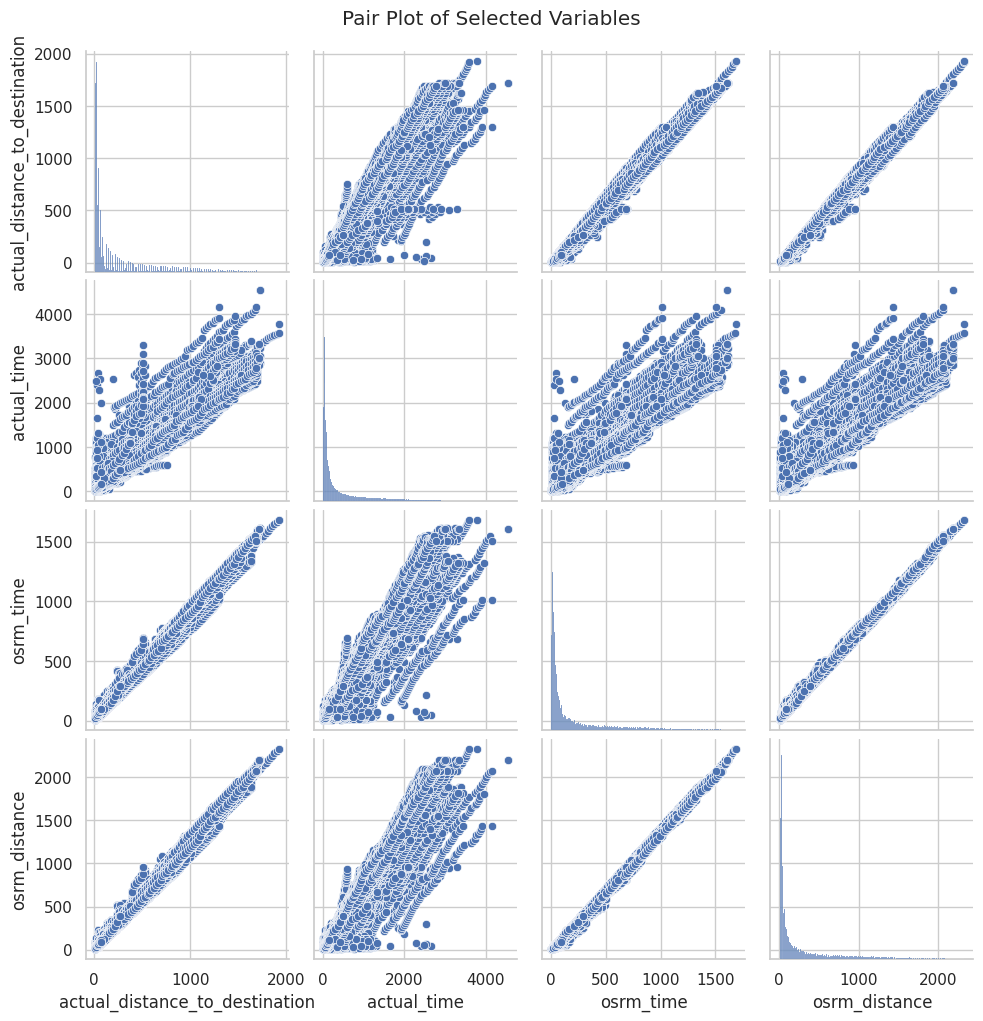

In [ ]:
sns.pairplot(Delhivery_df[['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance']])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()


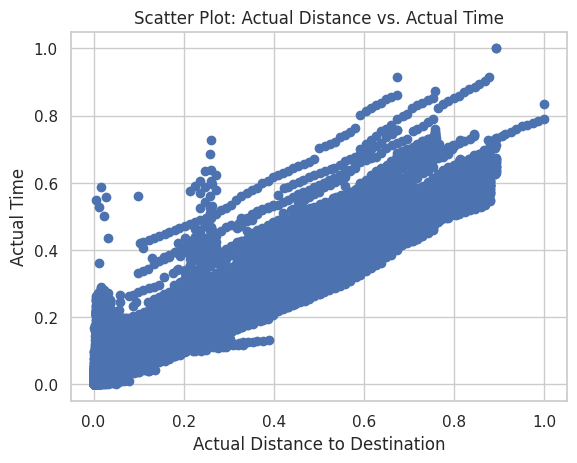

In [ ]:

plt.scatter(Delhivery_df['actual_distance_to_destination'], Delhivery_df['actual_time'])
plt.xlabel('Actual Distance to Destination')
plt.ylabel('Actual Time')
plt.title('Scatter Plot: Actual Distance vs. Actual Time')
plt.show()


# **6. In-depth analysis and Hypothesis Testing:**

highest number of Trips happening between/within two states :

In [ ]:
Delhivery_df.dtypes

In [ ]:
HOBS = Delhivery_df.groupby(["source_state","destination_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
HOBS = HOBS[HOBS["source_state"]!=HOBS["destination_state"]].head(20)

HOBS["souce-destination"] = HOBS["source_state"] + " - " + HOBS["destination_state"]
HOBS.drop(["source_state","destination_state"],axis = 1, inplace=True)
HOBS.columns = ["Number_of_trips_between_states","souce-destination_state"]

plt.figure(figsize=(11,5))
sns.barplot(y = HOBS["souce-destination_state"],
           x = HOBS["Number_of_trips_between_states"],)
plt.title("highest number of orders between two states")
plt.show()

In [ ]:
#Top 20 Longest Route as per : average actual time taken from one city to another city :
destination_traffic = data.groupby(["destination_city_state"])["trip_uuid"].nunique().reset_index()
source_traffic = data.groupby(["source_city_state"])["trip_uuid"].nunique().reset_index()
transactions = source_traffic.merge(destination_traffic,
                               left_on="source_city_state"
                               ,right_on="destination_city_state")
transactions.columns = ["source_city_state","#Trips_s","destination_city_state","#Trips_d"]
transactions["TripsTraffic"] = transactions["#Trips_s"]+transactions["#Trips_d"]
transactions.drop(["#Trips_s","#Trips_d","destination_city_state"],axis = 1,inplace=True)
transactions.columns = ["Warehouse_City(Junction)","TripsTraffic"]
T = transactions.sort_values(by=["TripsTraffic"],ascending=False).head(20)
plt.figure(figsize=(11,8))
sns.barplot(y = T["Warehouse_City(Junction)"],
           x = T["TripsTraffic"])
plt.title("Trips Traffic per Warehouse(for particular city)")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numerical_features = ['actual_time', 'osrm_time', 'actual_distance_to_destination', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
 # For MinMaxScaler
scaler = MinMaxScaler()

# For StandardScaler
# scaler = StandardScaler()


Delhivery_df[numerical_features] = scaler.fit_transform(Delhivery_df[numerical_features])
Delhivery_df[numerical_features].head()


,actual_time,osrm_time,actual_distance_to_destination,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,0.001105,0.002976,0.000748,0.001276,0.078300,0.006828,0.005460
1,0.003316,0.008333,0.005180,0.005488,0.077086,0.005587,0.004453
2,0.006854,0.013095,0.009715,0.010155,0.078907,0.004345,0.004935
3,0.011718,0.020238,0.014135,0.015775,0.080425,0.007449,0.005942
4,0.013044,0.022619,0.015839,0.019511,0.075873,0.003104,0.001787


In [ ]:

Delhivery_df_encoded = pd.get_dummies(Delhivery_df, columns=['route_type'])

# Display the first few rows of the DataFrame after one-hot encoding
print(Delhivery_df_encoded.head())


       data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid                trip_uuid  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   

  source_center                 source_name destination_center  \
0  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
1  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
2  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB

1. Hypothesis Testing on Time Taken and start_scan_to_end_scan :


To compare the difference between the time calculated from time_taken and the column start_scan_to_end_scan,

**Null Hypothesis (H0): **
 There is no significant difference between time_taken and start_scan_to_end_scan.
**Alternative Hypothesis (H1):**
There is a significant difference between time_taken and start_scan_to_end_scan.

**significance level = 0.05.**


In [ ]:
result = ttest_rel(Delhivery_df['time_taken_seconds'], Delhivery_df['start_scan_to_end_scan'].dropna())

print(result)

TtestResult(statistic=352.8525920837695, pvalue=0.0, df=144315)


 "Reject the null hypothesis: There is no significant difference between time_taken and start_scan_to_end_scan."

2. hypothesis testing or visual analysis between actual_time and osrm_time aggregated values

**Null Hypothesis (H0):**

There is no significant difference between actual_time and osrm_time.

**Alternative Hypothesis (H1):**

There is a significant difference between actual_time and osrm_time.


**significance level = 0.05.**

In [ ]:
result = ttest_rel(Delhivery_df['actual_time'], Delhivery_df['osrm_time'].dropna())

print(result)

TtestResult(statistic=254.25149135773418, pvalue=0.0, df=144315)


 "Reject the null hypothesis: There is no significant difference between actual_time and osrm_time."

3. Hypothesis testing between actual_time aggregated values and segment_actual_time aggregated values

The null hypothesis (H0):  There is no significant difference between actual_time and segment_actual_time

The Alternate hypothesis (H1):  There is   significant difference between actual_time and segment_actual_time

In [ ]:
agg_time_df = Delhivery_df.groupby('trip_uuid').agg({
    'actual_time': 'last',  # You can use other aggregation functions like mean, median, etc.
    'segment_actual_time': 'last',
        'osrm_time': 'last',
        'segment_osrm_time':'last'
}).reset_index()


In [ ]:

t_stat, p_value = ttest_rel(agg_time_df['segment_actual_time'], agg_time_df['segment_osrm_time'])

print(f'T-statistic: {t_stat}\nP-value: {p_value}')

T-statistic: 34.87566018681803
P-value: 3.6272236359567936e-256


 "Reject the null hypothesis: There is no significant difference between segment_actual_time and segment_osrm_time."

4  Hypothesis   between osrm distance aggregated value and segment osrm distance aggregated value

The null hypothesis (H0):  There is no significant difference between osrm distance aggregated value and segment osrm distance aggregated value

The Alternate hypothesis (H1): There is significant difference between osrm distance aggregated value and segment osrm distance aggregated value

In [ ]:
agg_distance_df = Delhivery_df.groupby('trip_uuid').agg({
    'osrm_distance': 'sum',  # You can use other aggregation functions like mean, median, etc.
    'segment_osrm_distance': 'sum'
}).reset_index()


In [ ]:

t_stat, p_value = ttest_rel(agg_distance_df['osrm_distance'], agg_distance_df['segment_osrm_distance'])

print(f'T-statistic: {t_stat}\nP-value: {p_value}')


T-statistic: 30.007054216027875
P-value: 4.3140630591777e-192


 "Reject the null hypothesis: There is no significant difference between osrm distance aggregated value and segment osrm distance aggregated value


In [ ]:
agg_time_df.head(3)

,trip_uuid,actual_time,segment_actual_time,osrm_time,segment_osrm_time
0,trip-153671041653548748,732.0,20.0,329.0,10.0
1,trip-153671042288605164,47.0,15.0,26.0,7.0
2,trip-153671043369099517,611.0,275.0,212.0,28.0


In [ ]:

t_stat, p_value = ttest_rel(agg_time_df['osrm_time'], agg_time_df['segment_osrm_time'])

print(f'T-statistic: {t_stat}\nP-value: {p_value}')


T-statistic: 54.47229316425447
P-value: 0.0


Performing hypothesis testing or visual analysis on the 'route_type' variable can provide insights into its relationship with other variables or its impact on the target variable. Here's how you can approach this:

Hypothesis Testing:
Null Hypothesis (H0): The distribution of the variable 'route_type' does not significantly affect the target variable.
Alternative Hypothesis (H1): The distribution of the variable 'route_type' significantly affects the target variable.
You can use statistical tests like the chi-square test (for categorical variables) or analysis of variance (ANOVA) if the target variable is continuous.

In [ ]:

# Contingency table
contingency_table = pd.crosstab(Delhivery_df['route_type'], Delhivery_df['start_scan_to_end_scan'])

# Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Check p-value
if p < 0.05:
    print("Reject the null hypothesis: 'route_type' significantly affects the start_scan_to_end_scan.")
else:
    print("Fail to reject the null hypothesis.")



Reject the null hypothesis: 'route_type' significantly affects the start_scan_to_end_scan.


In [ ]:

#Source_State vs. Time_Taken:
#Null Hypothesis (H0): The average time taken for deliveries is the same across all source states.
#Alternative Hypothesis (H1): The average time taken for deliveries varies significantly among source states.

# Source State vs Time Taken
source_state_groups = [Delhivery_df[Delhivery_df['source_state'] == state]['time_taken'] for state in Delhivery_df['source_state'].unique()]
anova_source_state, p_value_source_state = f_oneway(*source_state_groups)




#Destination_State vs. Time_Taken:
#Null Hypothesis (H0): The average time taken for deliveries is the same across all destination states.
#Alternative Hypothesis (H1): The average time taken for deliveries varies significantly among destination states.
# Destination State vs Time Taken
destination_state_groups = [Delhivery_df[Delhivery_df['destination_state'] == state]['time_taken'] for state in Delhivery_df['destination_state'].unique()]
anova_destination_state, p_value_destination_state = f_oneway(*destination_state_groups)



#Route_Type vs. Time_Taken:
#Null Hypothesis (H0): The average time taken for deliveries is the same for all route types.
#Alternative Hypothesis (H1): The average time taken for deliveries varies significantly among different route types.
# Route Type vs Time Taken
route_type_groups = [Delhivery_df[Delhivery_df['route_type'] == route_type]['time_taken'] for route_type in Delhivery_df['route_type'].unique()]
anova_route_type, p_value_route_type = f_oneway(*route_type_groups)

# Print results
print("ANOVA Source State vs Time Taken:")
print("F-statistic:", anova_source_state)
print("P-value:", p_value_source_state)

print("\nANOVA Destination State vs Time Taken:")
print("F-statistic:", anova_destination_state)
print("P-value:", p_value_destination_state)

print("\nANOVA Route Type vs Time Taken:")
print("F-statistic:", anova_route_type)
print("P-value:", p_value_route_type)


ANOVA Source State vs Time Taken:
F-statistic: 1468.2150700560185
P-value: 0.0

ANOVA Destination State vs Time Taken:
F-statistic: 666.8967180645212
P-value: 0.0

ANOVA Route Type vs Time Taken:
F-statistic: 45892.949438045944
P-value: 0.0


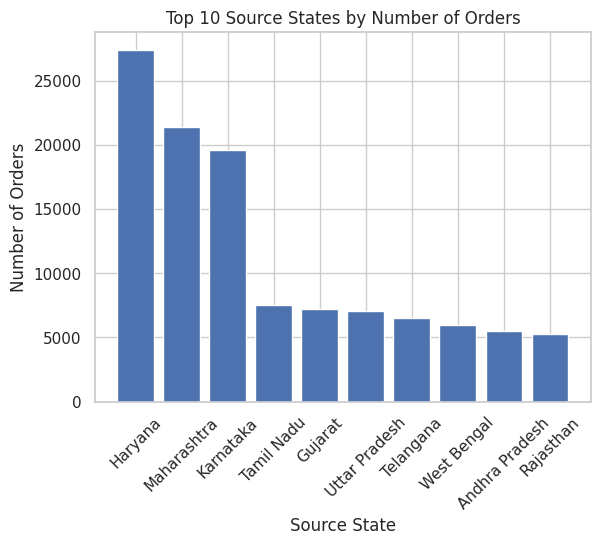

In [ ]:
#To find out where most orders are coming from (based on the state), you can use the following steps:
orders_by_state = Delhivery_df.groupby('source_state').size().reset_index(name='order_count')
orders_by_state = orders_by_state.sort_values(by='order_count', ascending=False)
import matplotlib.pyplot as plt

top_states = orders_by_state.head(10)

plt.bar(top_states['source_state'], top_states['order_count'])
plt.xlabel('Source State')
plt.ylabel('Number of Orders')
plt.title('Top 10 Source States by Number of Orders')
plt.xticks(rotation=45)
plt.show()



 hypothesis  test whether there is a significant difference in the average delivery time (actual_time) between different route types (route_type). Here's a step-by-step guide:

Null Hypothesis (H0): There is no significant difference in average delivery time between route types.

Alternative Hypothesis (H1): There is a significant difference in average delivery time between route types.

Significance Level (α): 0.05

In [ ]:


# Hypothetical Data (replace with your actual data)
# and 'route_type' is the categorical variable
data = Delhivery_df[['actual_time', 'route_type']].dropna()

# Perform One-way ANOVA
f_statistic, p_value = stats.f_oneway(*[group['actual_time'] for name, group in data.groupby('route_type')])

# Analyze Results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Set Significance Level
alpha = 0.05

# Make a Decision
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average delivery time between route types.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average delivery time between route types.")


F-statistic: 26130.09629118247
P-value: 0.0
Reject the null hypothesis: There is a significant difference in average delivery time between route types.


# **7. Business Insights**

1. The dataset exhibits significant skewness, and it spans only two months, namely September and October 2018.

  *   There are total 14817 different trips of data available
  *   There are 1508 unique source_center
  *   There are 1481 unique destination_center
  *   There are total 1504 delivery routes
2. The average actual time differs from the average segment OSRM time.
3. The average OSRM distance is comparable to the average segment OSRM distance.
4. The average actual time surpasses the average segment OSRM time.
5. Approximately 31% of transportation is via Carting, while around 69% is via FTL Transportation.
The majority of orders originate and culminate in the same state, Maharashtra.
6. Busiest Corridor (by distance): ('Chandigarh_Mehmdpur_H ', 'Bangalore'), Avg. Distance: 1050.7516678097484, Avg. Time: 1682.7283950617284
7. Busiest Corridor (by time): ('Delhi_Airport_H ', 'Guwahati'), Avg. Distance: 759.6611628624659, Avg. Time: 1861.8676470588234
8. Quietest Corridor (by distance): ('Bengaluru_South_D_20 ', 'Bengaluru'), Avg. Distance: 9.028851667115056, Avg. Time: 30.0
9. Quietest Corridor (by time): ('Nabarangpr_PhdofDPP_D ', 'Pappadahandi'), Avg. Distance: 11.060638382776276, Avg. Time: 13.666666666666666
10. Unfortunately, the dataset lacks financial fields, hindering financial analysis. Nevertheless, it suggests that cities, states, and days with the highest order counts likely contribute to higher revenue.  


# **8. Recommendations**

1. Based on the analysis, it is recommended to employ Carting (small vehicles) for intra-city deliveries to reduce delivery time, while utilizing heavy trucks for long-distance trips or heavy loads. This optimization strategy aims to enhance delivery efficiency and revenue generation.

2. Expanding connectivity in tier 2 and tier 3 cities, coupled with strategic partnerships with prominent e-commerce entities, can contribute to increased revenue and enhance the company's reputation for seamless cross-border connectivity.

3. Efforts can be directed towards optimizing scanning times at both ends, specifically focusing on start and end scanning times. This initiative aims to align delivery times with the estimated delivery time provided by the OSRM (Open Source Routing Machine) for enhanced efficiency.

4. A thorough review of the information provided to the routing engine for trip planning is recommended. This includes checking for any discrepancies with transporters to ensure the routing engine is configured for optimal results.

5. While North, South, and West Zone corridors show significant order traffic, a smaller presence is observed in Central, Eastern, and North-Eastern zones. However, drawing conclusive insights from just a two-month dataset may be challenging. Therefore, further investigation is warranted to enhance our presence in these regions.

6. From a state perspective, heavy order traffic is noted in Maharashtra, followed by Karnataka. This highlights the need for prioritized resource planning in these two states, particularly during festive seasons.